# EDA на прикладі вина

https://github.com/Ashish25/EDA_Rmd/blob/master/MyWhiteWine.Rmd

https://www.knowledgehut.com/blog/data-science/eda-data-science

## Етапи дослідницького аналізу даних (Exploratory Data Analysis)
* **Збір даних**з Збір та об'єднання всіх необхідних даних для аналіз
   у2. **Очищення даних*в: Видалення або виправлення помилок, пропущених значень та аномалій у дан
   и
3. **Описова статистикао*: Обчислення основних статистичних показників, таких як середнє, медіана, мода, стандартне відхилення т
   о
4. **Візуалізація данис**: Створення графіків та діаграм для виявлення закономірностей, трендів та взаємозв'язків у д
   а.
5. **Виявлення взаємозв'язкав**: Аналіз кореляцій та інших статистичних взаємозв'язків між змі
    ни.
6. **Формулювання гіповез**: Висування гіпотез на основі виявлених закономірностей та взаємозв
    'ів.
7. **Перевірка гіпвтез**: Використання статистичних методів для перевірки висунутих 
    гтез.
8. **Інтерпретація резульаатів**: Аналіз отриманих результатів та формулювання в
    и
вків.
9. **Документдвання**: Документування всіх етапів аналізу, включаючи проблеми, рішення та висновки.

Оволодіння дослідницьким аналізом даних (EDA) є важливим для розуміння ваших даних, виявлення закономірностей та отримання інсайтів, які можуть інформувати подальший аналіз або прийняття рішень. Дані є життєво важливими для передових груп, і здатність витягувати інсайти з даних стала важливим навиком у сучасному світі, орієнтованому на статистику. Дослідницький аналіз даних (EDA) є потужним методом, який дозволяє аналітикам, вченим та дослідникам отримати повне уявлення про свої дані до початку формального моделювання або тестування гіпотез.

Це ітеративний процес, який включає узагальнення, візуалізацію та дослідження інформації для виявлення закономірностей, аномалій та взаємозв'язків, які можуть бути неочевидними на перший погляд. У цій статті ми зрозуміємо та реалізуємо критичні кроки для виконання дослідницького аналізу даних. Ось кроки, які допоможуть вам оволодіти EDA:

## Кроки для оволодіння дослідницьким аналізом даних

**Крок 1:** Зрозумійте проблему та дані  
**Крок 2:** Імпортуйте та перевірте дані  
**Крок 3:** Обробка пропущених значень  
**Крок 4:** Дослідження характеристик даних  
**Крок 5:** Виконання трансформації даних  
**Крок 6:** Візуалізація взаємозв'язків даних  
**Крок 7:** Обробка викидів  
**Крок 8:** Комунікація висновків та інсайтів

### Мета цього проекту

У цьому проекті ми будемо аналізувати дані про біле вино і намагатися зрозуміти, які змінні відповідають за якість вина. Спочатку ми спробуємо отримати уявлення про змінні самі по собі, а потім спробуємо знайти кореляцію між ними та якістю вина з урахуванням інших факторів.

In [3]:
#install.packages("GGally")

In [6]:
library(ggplot2)
library(RColorBrewer)
library(GGally)

In [19]:
white_wines <- read.csv('https://raw.githubusercontent.com/Ashish25/EDA_Rmd/refs/heads/master/wineQualityWhites.csv', 
                        header = TRUE, 
                        sep = ',', 
                        row.names = 1)

### Контекст

Два набори даних стосуються червоних і білих варіантів португальського вина "Vinho Verde". Для отримання додаткової інформації зверніться до посилання [Cortez et al., 2009]. Через питання конфіденційності та логістики доступні лише фізико-хімічні (вхідні) та сенсорні (вихідні) змінні (наприклад, немає даних про типи винограду, бренд вина, ціну продажу вина тощо).

Ці набори даних можна розглядати як завдання класифікації або регресії. Класи впорядковані і не збалансовані (наприклад, набагато більше звичайних вин, ніж відмінних або поганих).

Цей набір даних також доступний у репозиторії машинного навчання UCI: https://archive.ics.uci.edu/ml/datasets/wine+quality. 

### Опис
Для отримання додаткової інформації читайте [Cortez et al., 2009].

Вхідні змінні (на основі фізико-хімічних тестів):
1. **fixed acidity** - фіксована кислотність
2. **volatile acidity** - летка кислотність
3. **citric acid** - лимонна кислота
4. **residual sugar** - залишковий цукор
5. **chlorides** - хлориди
6. **free sulfur dioxide** - вільний діоксид сірки
7. **total sulfur dioxide** - загальний діоксид сірки
8. **density** - густина
9. **pH** - рівень pH
10. **sulphates** - сульфати
11. **alcohol** - вміст алкоголю

Вихідна змінна (на основі сенсорних даних):
12. **quality** - якість (оцінка від 0 до 10)

### Перший погляд

Ми маємо наступні змінні:

In [12]:
names(white_wines)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

In [14]:
str(white_wines)

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


In [16]:
summary(white_wines)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

### Підсумок

Підсумок показує, що максимальні значення для змінних **residual sugar** (залишковий цукор), **chlorides** (хлориди) та **free sulfur dioxide** (вільний діоксид сірки) значно відрізняються від інших значень. Це можуть бути викиди або проблеми з введенням даних, або ж це можуть бути дійсно особливі вина.

## Одновимірні графіки

Давайте побудуємо розподіл кожної змінної, оскільки я хочу спочатку отримати уявлення про змінні. Виходячи з форми розподілу, тобто нормального, позитивного або негативного перекосу, і кількості викидів, це також допоможе нам зрозуміти, чого очікувати, коли я буду будувати графіки різних змінних одна проти одної.

### Якість (Quality)

Оскільки якість є числовою змінною, ми додамо її як фактор.

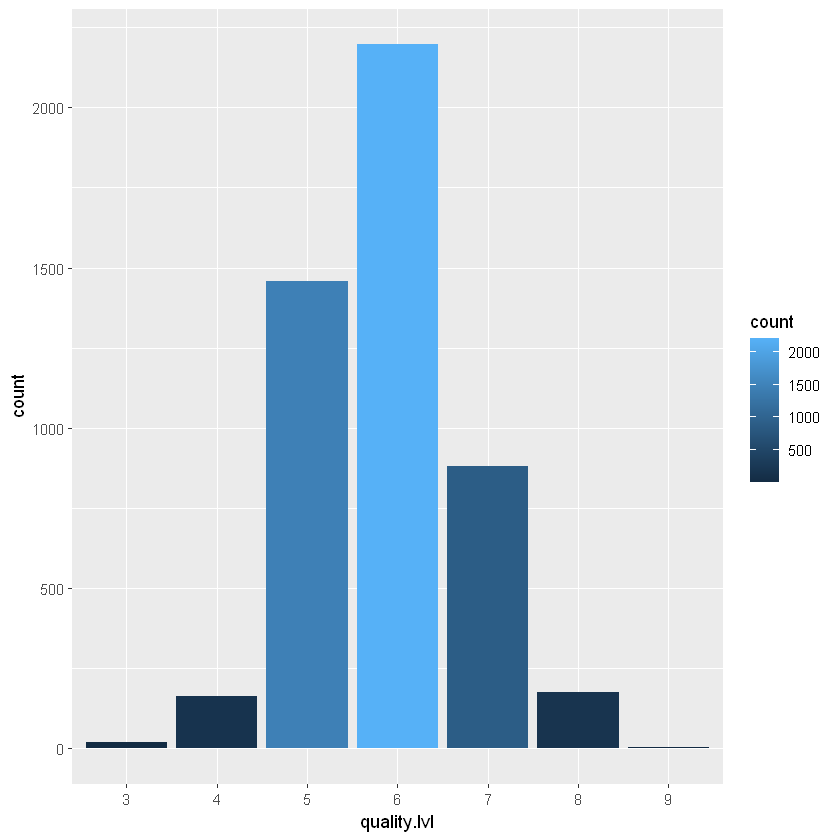

In [22]:
white_wines$quality.lvl=cut(white_wines$quality, 
                          c(0,1,2,3,4,5,6,7,8,9,10), 
                          labels = c(1,2,3,4,5,6,7,8,9,10))

ggplot(aes(x = quality.lvl, fill = after_stat(count)), data = white_wines) +
  geom_bar() +
  scale_x_discrete()

Схоже на нормальний розподіл. Більшість вин мають якість близько 5/6/7. Оскільки вина хорошої та поганої якості майже як викиди, може бути важко отримати точну модель якості вина. Давайте подивимося на інші графіки.

***

### Алкоголь (Alcohol)

Давайте перевіримо розподіл алкоголю.

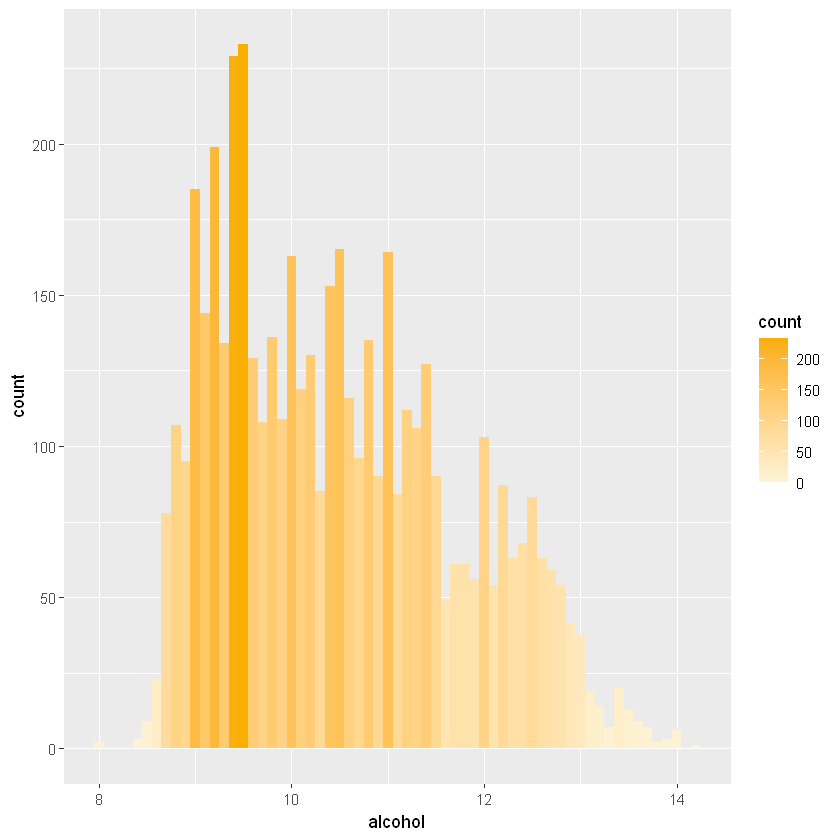

In [25]:
ggplot(aes(x = alcohol, fill = ..count..), data = white_wines) +
  geom_histogram(binwidth = 0.1) +
  scale_fill_gradient(low = "#fcf4d9", high = "#f9ae00")

Набагато більш різнорідний, але ми маємо гарний пік близько 9,5% за об'ємом. Загалом, це все ще виглядає як нормальний розподіл, з невеликим перекосом вліво.

### Залишковий цукор (Residual Sugar)

Залишковий цукор - це кількість цукру, що залишилася після ферментації.

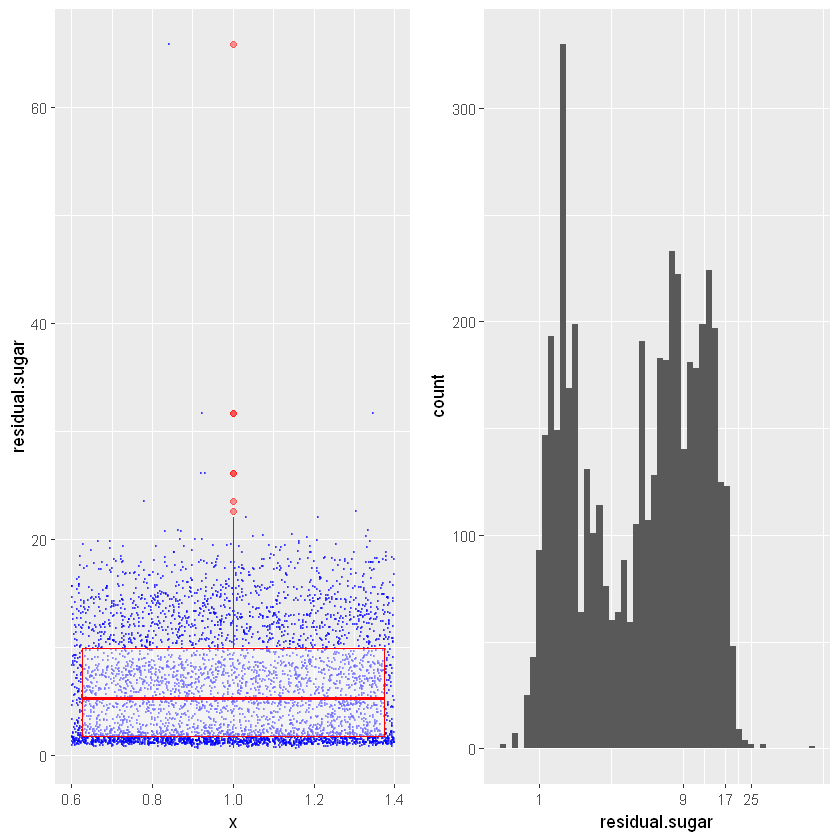

In [27]:
gridExtra:: grid.arrange(ggplot(white_wines, aes( x = 1, y = residual.sugar ) ) + 
               geom_jitter(color = 'blue', size = 0.2, alpha = 0.5 ) +
               geom_boxplot(alpha = 0.4, color = 'red' ) ,
             ggplot(white_wines, aes( x   = residual.sugar  ) ) + scale_x_log10(breaks = seq(1,30,8)) +
                   geom_histogram(binwidth = 0.04),ncol=2)

Шкала X в логарифмічному масштабі (log10). Ми маємо той самий тип розподілу, але з довгим хвостом. Пік знаходиться близько 1,5 г/дм³, а дані, здається, доходять до 25 г/дм³. Давайте подивимося на підсумок.

In [29]:
summary(white_wines$residual.sugar)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.600   1.700   5.200   6.391   9.900  65.800 

Максимальне значення становить 65 (що досить дивно), тоді як третій квартиль знаходиться на рівні 9,9, а медіана - на рівні 5,2. Отже, це досить особливі вина або є якась помилка в даних.

### Хлориди (Chlorides)

Хлориди - це сіль, і я вважаю, що вони не додають гарного смаку вину.

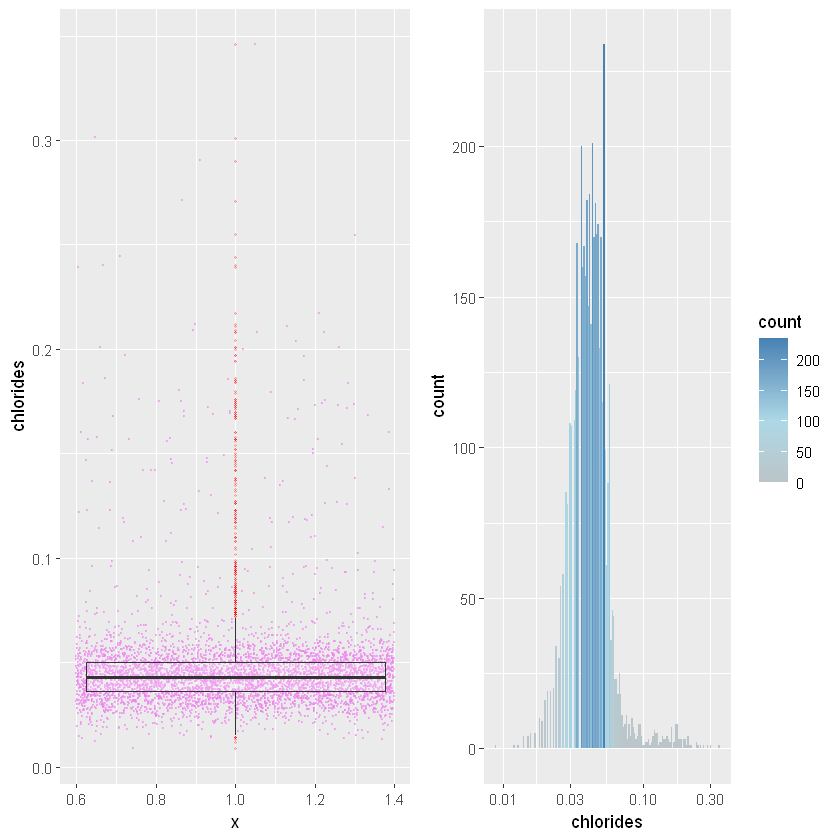

In [31]:
gridExtra:: grid.arrange(ggplot(white_wines, aes( x = 1, y = chlorides ) ) + 
               geom_jitter(color = 'violet', size = 0.2, alpha = 0.5 ) +
               geom_boxplot(outlier.colour = 'red', alpha = 0.2, outlier.size = 0.5 ) ,
             ggplot(white_wines, aes( x   = chlorides, fill = ..count..) ) +
               scale_x_continuous(trans = 'log10') +
               scale_fill_gradient2(low = "grey", high = "steelblue", midpoint = 100, mid = "lightblue") +
                   geom_histogram(binwidth = 0.01),ncol=2)

Ми маємо нормальний розподіл після перетворення осі X за допомогою функції log10. Як і у випадку з залишковим цукром, ми маємо правий довгий хвіст даних.

In [33]:
summary(white_wines$chlorides)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00900 0.03600 0.04300 0.04577 0.05000 0.34600 

Одиниця виміру така ж, як і для залишкового цукру, але значення набагато нижчі. Медіана становить 0,043 г/дм³. Максимальне значення знову більше ніж у 80 разів вище, що не є нормальним.

***

### Лимонна кислота (Citric acid)

У невеликих кількостях лимонна кислота може додати свіжості та яскравості вину.


Warning message in scale_x_continuous(trans = "log10"):
"log-10 transformation introduced infinite values."
Warning message:
"Removed 19 rows containing non-finite outside the scale range (`stat_bin()`)."


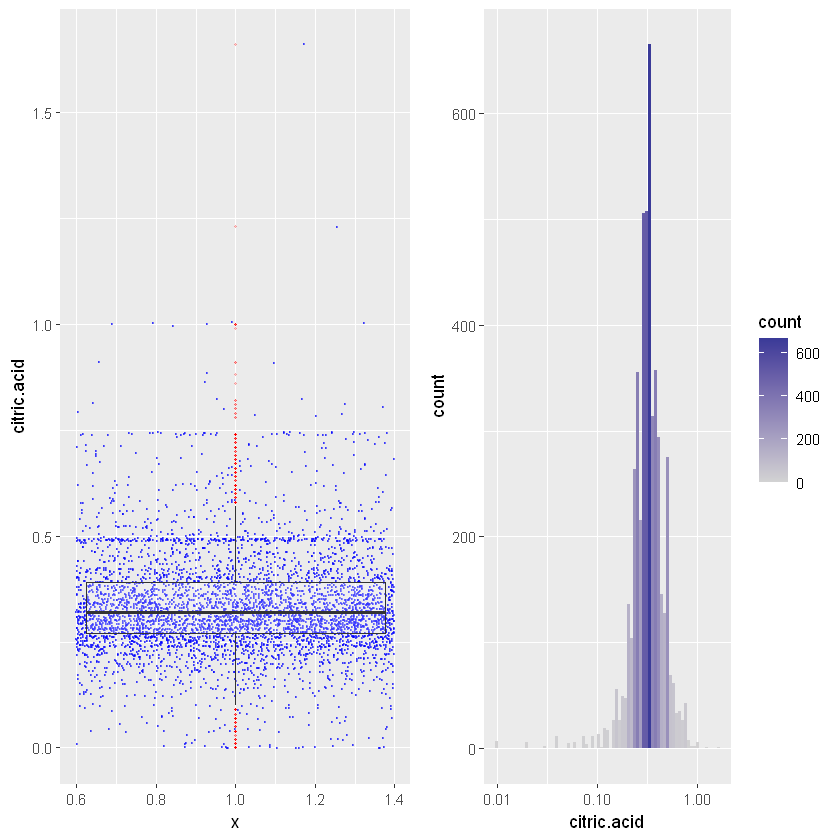

In [35]:
gridExtra:: grid.arrange(ggplot(white_wines, aes( x = 1, y = citric.acid ) ) + 
               geom_jitter(color = 'blue', size = 0.2, alpha = 0.5 ) +
               geom_boxplot(outlier.colour = 'red', alpha = 0.2, outlier.size = 0.5 ) ,
             ggplot(white_wines, aes( x   = citric.acid, fill = ..count..) ) +
               scale_x_continuous(trans = 'log10') +
               scale_fill_gradient2(mid = "lightgrey") +
                   geom_histogram(binwidth = 0.03),ncol=2)

Розглядаючи лимонну кислоту в логарифмічному масштабі (log10), ми знову маємо нормальний розподіл, звісно, з кількома помітними викидами.

In [37]:
summary(white_wines$citric.acid)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2700  0.3200  0.3342  0.3900  1.6600 

Знову ж таки, медіана становить 0,32 г/дм³, тоді як максимальне значення - 1,6, а мінімальне - 0.

### pH

Шкала pH від 0 (дуже кислий) до 14 (дуже лужний). Більшість вин мають pH між 3 і 3,5.

Warning message in geom_bar(binwidth = 0.01, position = "identity", fill = "#ffc532", :
"Ignoring unknown parameters: `binwidth`"


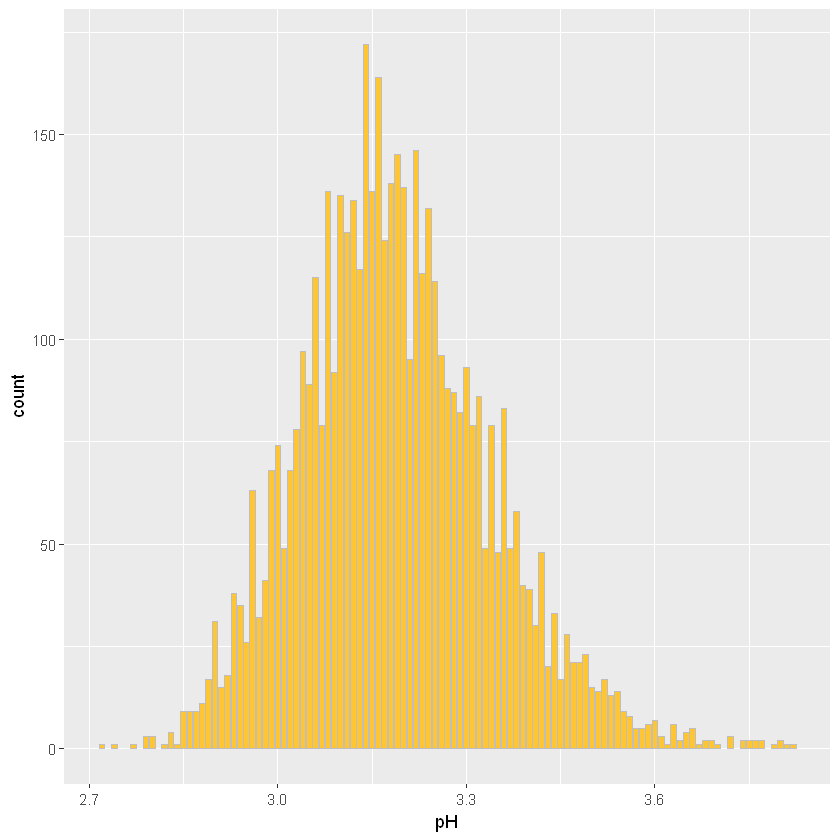

In [40]:
ggplot(aes(x = pH), data = white_wines) +
  geom_bar(binwidth = 0.01, position = 'identity', fill = '#ffc532', colour = 'grey')

pH має нормальний розподіл з піком без необхідності використання логарифмічної шкали. Ми можемо побачити, що дані досить розсіяні, але, як зазначено в описі, більшість точок даних знаходяться між 3 і 3,5.

In [42]:
summary(white_wines$pH)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.720   3.090   3.180   3.188   3.280   3.820 

Мінімальне та максимальне значення знову досить далеко від медіани та відповідно першого і третього квартилів, але не так багато варіацій.

### Летюча кислотність (Volatile acidity)

Летюча кислотність - це кількість оцтової кислоти у вині. При високій концентрації вона надає неприємного смаку оцту, що, на мою думку, характерно для вина низької якості.

Warning message in geom_bar(binwidth = 0.01, position = "identity"):
"Ignoring unknown parameters: `binwidth`"


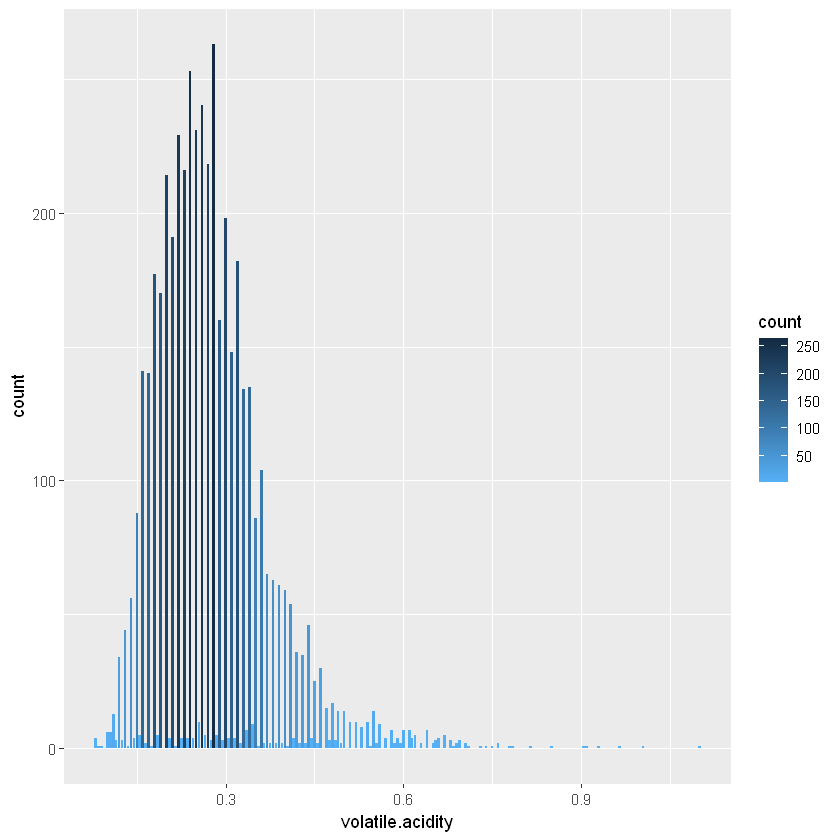

In [44]:
ggplot(aes(x = volatile.acidity, fill = ..count..), data = white_wines) +
  geom_bar(binwidth = 0.01, position = 'identity') +
  scale_fill_gradient(low = "#56B1F7", high = "#132B43")

In [46]:
summary(white_wines$volatile.acidity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0800  0.2100  0.2600  0.2782  0.3200  1.1000 

Дані все ще мають довгий хвіст з піком близько 0,3 г/дм³ оцтової кислоти.

Максимальне значення дійсно виходить за межі інших точок даних. Медіана становить 0,26 г/дм³ оцтової кислоти, а середнє значення дуже схоже - 0,2782 г/дм³ оцтової кислоти.

In [ ]:
### Загальний діоксид сірки (Total Sulfur Dioxide)

Загальний діоксид сірки - це сума вільних (для окислення вина) та зв'язаних форм сірки. При високій концентрації він може впливати на смак.

In [ ]:
ggplot(aes(x = total.sulfur.dioxide), data = white_wines) +
  geom_bar(binwidth = 0.01, position = 'identity', fill = "grey25", alpha = 0.7) +
  coord_cartesian() +
  scale_x_log10(breaks = seq(1,500,100))

Вісь x перетворена за допомогою log10. Ми маємо кілька горбів, але загалом нормальний розподіл. Деякі точки даних здаються ізольованими. Давайте розглянемо підсумок змінної.

In [47]:
summary(white_wines$total.sulfur.dioxide)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    9.0   108.0   134.0   138.4   167.0   440.0 

Максимальне значення дійсно занадто високе порівняно з медіаною та третім квартилем. Я думаю, що це помилка у звітуванні/записі даних.

Основна лінія досліджень буде стосуватися взаємозв'язку між усіма змінними та якістю.

## Двовимірний аналіз

### Алкоголь і якість

Чи впливає рівень алкоголю на якість?

[1] 0.4355747

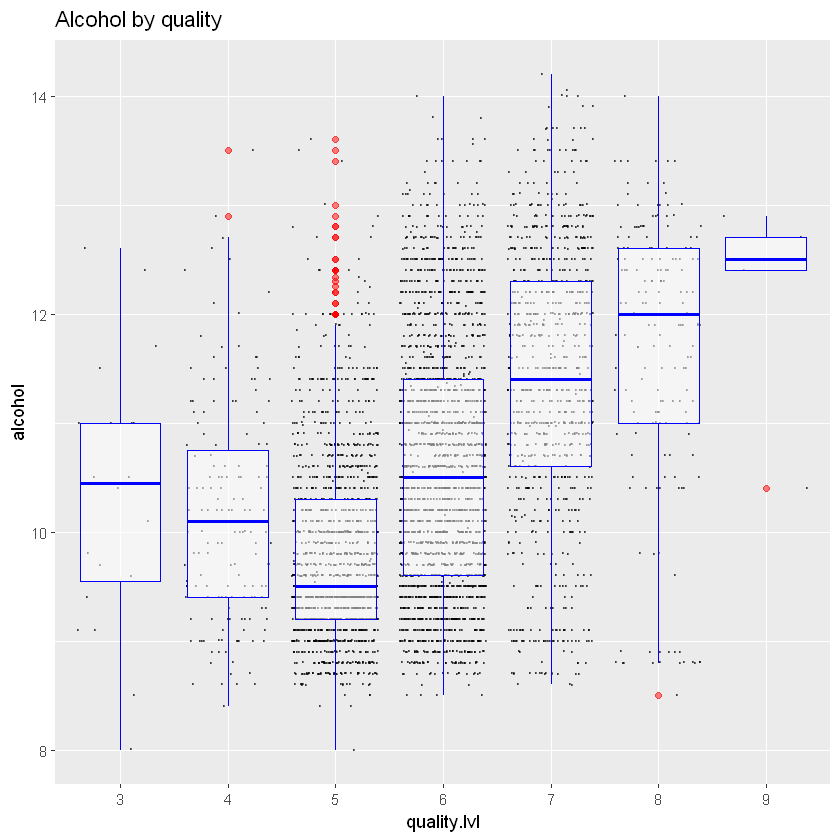

In [50]:
ggplot(aes(x = quality.lvl, y = alcohol), data = white_wines) +
  geom_jitter(alpha = 0.5, size = 0.2) +
  geom_boxplot(outlier.colour= 'red', alpha = 0.5, color = 'blue') +
  ggtitle("Alcohol by quality")

cor(white_wines$alcohol, white_wines$quality)

Існує середня кореляція (близько 0,435) між якістю та алкоголем, графік показує, що чим вища якість, тим кращий алкоголь. Це особливо вірно для вин вищого класу.

***
### Змінні кислотності

У нас є 3 типи кислотності:

* Фіксована кислотність: більшість кислот, що містяться у вині, є фіксованими або нелеткими (не випаровуються легко)
* Летюча кислотність: кількість оцтової кислоти у вині, яка при занадто високих рівнях може призвести до неприємного смаку оцту
* Лимонна кислота: зустрічається в невеликих кількостях, лимонна кислота може додати винам "свіжості" та смаку

Вони всі повинні бути пов'язані з pH, я думаю.

In [52]:
cor(white_wines$pH, white_wines$fixed.acidity)

cor(white_wines$pH, white_wines$volatile.acidity)

cor(white_wines$pH, white_wines$citric.acid)

[1] -0.4258583

[1] -0.03191537

[1] -0.1637482

Отже, фіксована кислотність і лимонна кислота досить сильно корелюють з pH (близько -0,42 і -0,16 відповідно), але не летюча кислотність (близько -0,03).

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


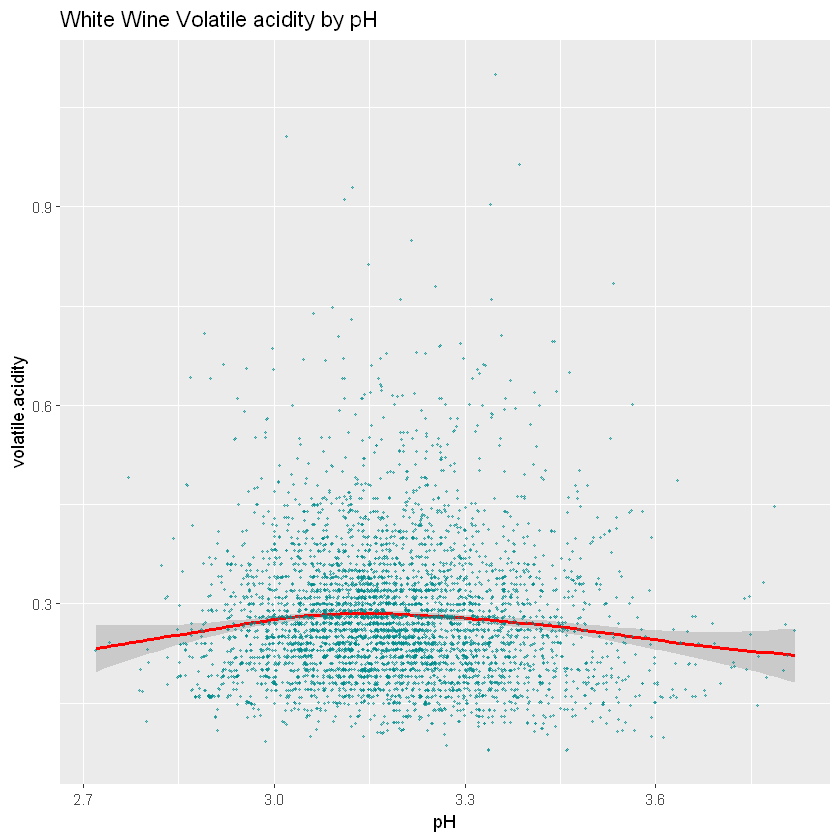

In [54]:
ggplot(aes(x = pH, y = volatile.acidity), data = white_wines) +
  geom_smooth(color = 'red1') +
  geom_jitter(alpha = 0.5, color = 'cyan4', size = 0.6) +
  ggtitle("White Wine Volatile acidity by pH")

Летюча кислотність і pH не пов'язані. Навіть для вин високої якості pH, здається, сильно варіюється. Це підтверджує низьку кореляцію, виявлену раніше.

### Якість і pH

Давайте тепер уважніше розглянемо взаємозв'язок між pH і якістю.

$title
[1] "White Wine pH by quality"

attr(,"class")
[1] "labels"

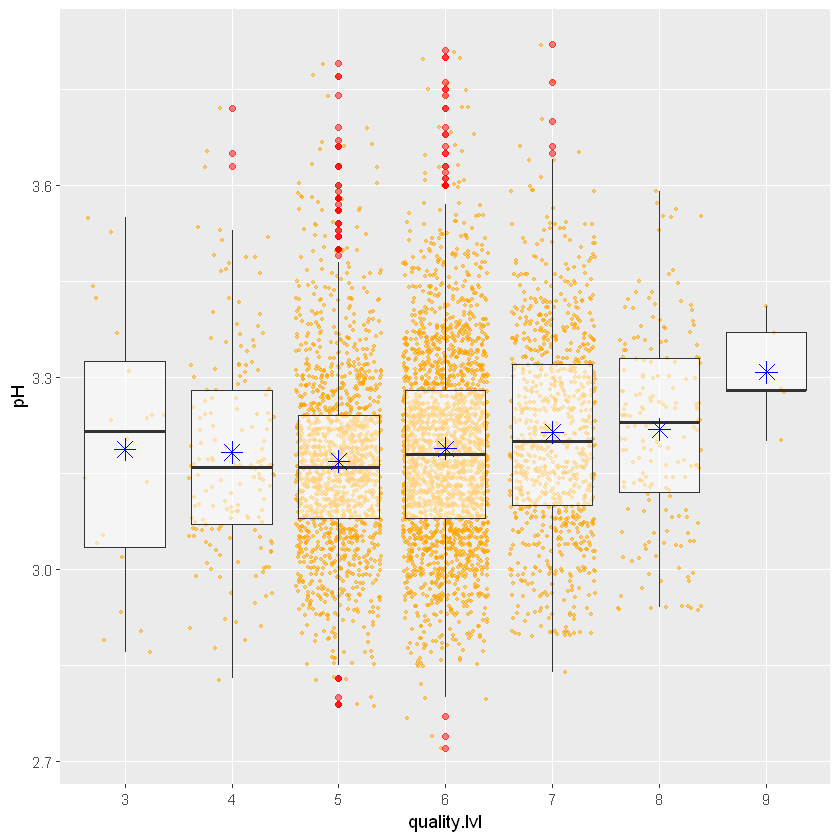

In [56]:
ggplot(aes(x = quality.lvl, y = pH), data = white_wines) +
  geom_jitter(alpha = 0.5, color = 'orange', size = 0.7) +
  geom_boxplot(outlier.color = 'red', alpha = 0.5) +
  stat_summary(fun.y = "mean", geom = "point", color = "blue", shape = 8, size = 4)
  ggtitle("White Wine pH by quality")

Чим вища якість, тим вищий pH, але це не дуже чітко видно.

In [58]:
cor(white_wines$pH, white_wines$quality)

[1] 0.09942725

Коефіцієнт кореляції між ними дуже низький і становить 0,09. Отже, перше враження від графіка насправді не підтверджується числом.

А як щодо солі? (Хлорид)

### Якість і хлориди

Нагадаємо, підсумок хлоридів.

In [60]:
summary(white_wines$chlorides)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00900 0.03600 0.04300 0.04577 0.05000 0.34600 

Підсумок показує, що максимальне значення становить 0,346, тоді як третій квартиль становить 0,05. Давайте збільшимо масштаб, щоб отримати кращий огляд.

Warning message:
"Removed 469 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 469 rows containing non-finite outside the scale range (`stat_summary()`)."
Warning message:
"Removed 509 rows containing missing values or values outside the scale range (`geom_point()`)."


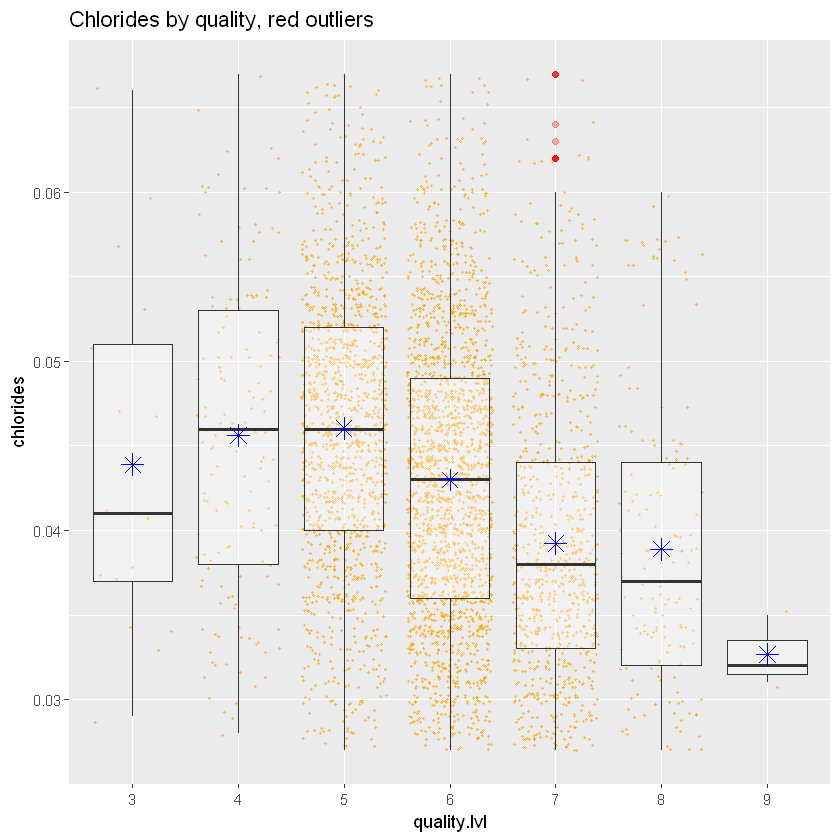

In [62]:
#coloring outlier and limiting the y scale to have a better look

ggplot(aes(x = quality.lvl, y = chlorides), data = white_wines) +
  geom_jitter(alpha = 0.5, color = 'orange', size =0.6) +
  geom_boxplot(outlier.colour = 'red', alpha = 0.3) +
  stat_summary(fun.y = "mean", geom = "point", color = "blue", shape = 8, size = 4) +
  coord_cartesian() +
  ylim(quantile(white_wines$chlorides,0.05),quantile(white_wines$chlorides,0.95)) +
  ggtitle("Chlorides by quality, red outliers")

Графік обмежений між 0,05 і 0,95 квантилями. Є деякі перекриття, але чим вища якість, тим менше хлоридів. (Це певною мірою підтверджує нашу попередню гіпотезу, що наявність солі погано впливає на смак вина)

In [65]:
cor(white_wines$quality,white_wines$chlorides)

[1] -0.2099344

Кореляція дуже низька і становить -0,20. Отже, взаємозв'язок між цими двома змінними не дуже сильний.

Остання змінна, яка очевидно впливає на смак (а отже, і на якість), на мою думку, це цукор.

### Якість і залишковий цукор

Warning message:
"Removed 411 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 411 rows containing non-finite outside the scale range (`stat_summary()`)."
Warning message:
"Removed 481 rows containing missing values or values outside the scale range (`geom_point()`)."


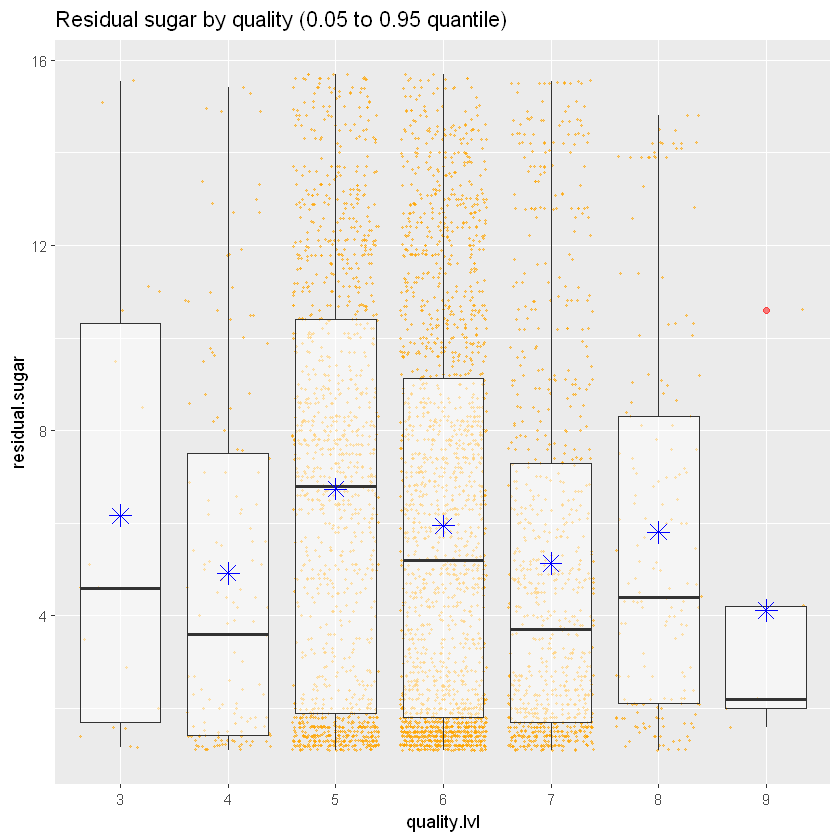

In [67]:
ggplot(aes(x = quality.lvl, y = residual.sugar), data = white_wines) +
  geom_jitter(color = 'orange', alpha = 0.5, size = 0.5) +
  geom_boxplot(outlier.color='red', alpha = 0.5) +
  stat_summary(fun.y = "mean", geom = "point", color = "blue", shape = 8, size = 4) +
  coord_cartesian() +
  ylim(quantile(white_wines$residual.sugar,0.05),
       quantile(white_wines$residual.sugar,0.95)) +
  ggtitle("Residual sugar by quality (0.05 to 0.95 quantile)")

Немає чіткого взаємозв'язку між цукром і якістю. Точковий графік показує точки по всьому діапазону. Що стосується діаграми розмаху, то медіана здається вищою для середнього діапазону якості, але нічого особливого тут не помітно.

In [69]:
cor(white_wines$quality,white_wines$residual.sugar)

[1] -0.09757683

Кореляція підтверджує, що взаємозв'язок дуже низький (-0,09), майже незначний.

## Багатовимірний аналіз

Уважніше розглянемо хлориди.

### Хлориди та алкоголь за якістю

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Failed to fit group -1.
Caused by error in `smooth.construct.cr.smooth.spec()`:
! x has insufficient unique values to support 10 knots: reduce k."


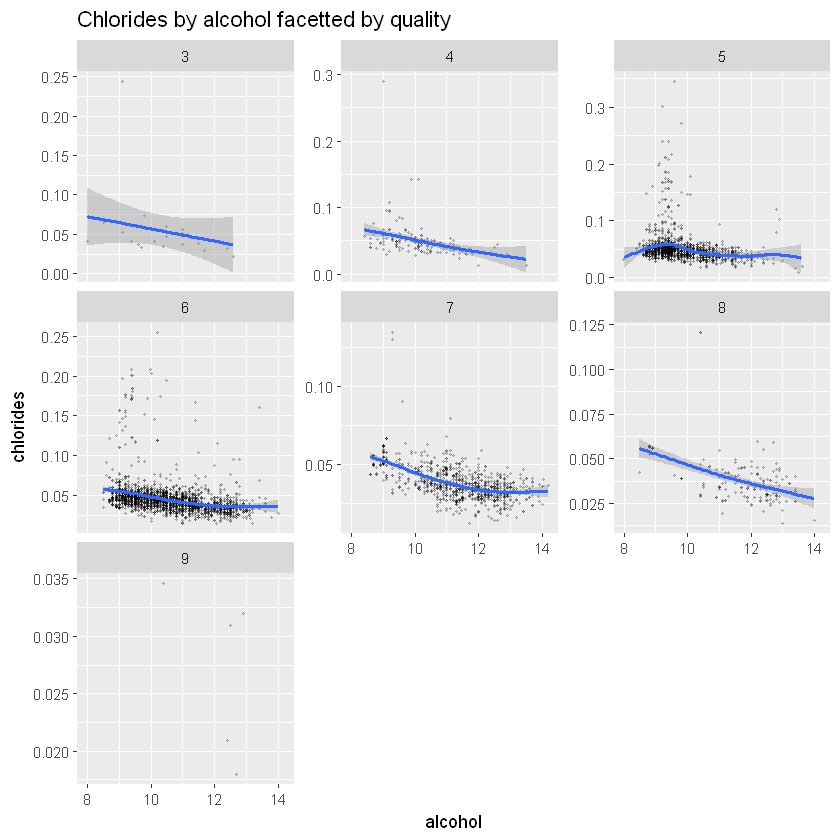

In [71]:
ggplot_base_alcohol.quality<-ggplot(aes(x = alcohol), data = white_wines) +
  facet_wrap(~quality.lvl, scales = 'free_y')
  
ggplot_base_alcohol.quality +
   geom_jitter(aes(y = chlorides), alpha =0.2, size = 0.4) +
  geom_smooth(aes(y = chlorides)) +
  ggtitle("Chlorides by alcohol facetted by quality")

Загальна тенденція знижується: менше хлоридів при підвищенні рівня алкоголю.
Але ми можемо побачити, що для найвищих 4 якостей (6, 7, 8) ми маємо основну концентрацію навколо 10-12, де рівень солі трохи підвищується. Це можуть бути деякі викиди, оскільки ми маємо лише кілька точок для цієї якості.

In [73]:
with(subset(white_wines, quality.lvl==5),cor(chlorides,alcohol))
with(subset(white_wines, quality.lvl==6),cor(chlorides,alcohol))
with(subset(white_wines, quality.lvl==7),cor(chlorides,alcohol))
with(subset(white_wines, quality.lvl==8),cor(chlorides,alcohol))

[1] -0.2231098

[1] -0.3199424

[1] -0.5545504

[1] -0.5124824

Кореляція між хлоридами та алкоголем становить:

* -0,223 для якості 5
* -0,319 для якості 6
* -0,554 для якості 7
* -0,512 для якості 8

Кореляції слабкі для 5-го та 6-го рівнів якості, але досить помітні між 7-м і 8-м рівнями.

### Залишковий цукор і алкоголь за якістю

Давайте подивимося на те ж саме з цукром:

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Failed to fit group -1.
Caused by error in `smooth.construct.cr.smooth.spec()`:
! x has insufficient unique values to support 10 knots: reduce k."


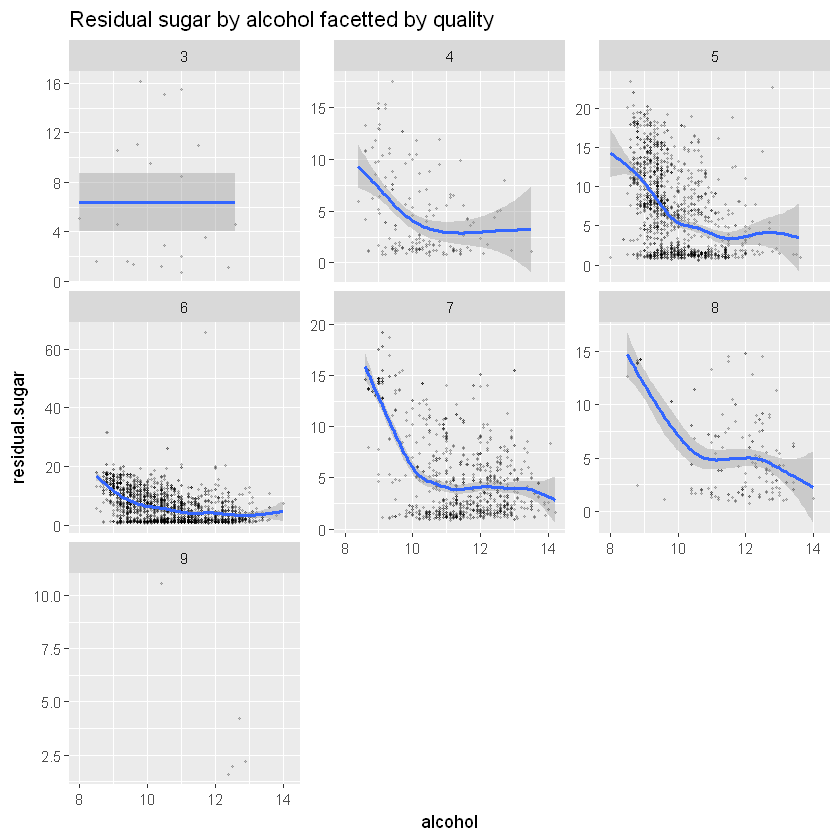

In [76]:
ggplot_base_alcohol.quality +
  geom_jitter(aes(y = residual.sugar), alpha =0.2, size = 0.4) +
  geom_smooth(aes(y = residual.sugar)) +
  ggtitle("Residual sugar by alcohol facetted by quality")

Загальна тенденція до зниження тут помітна. Давайте підтвердимо це за допомогою кореляції.

In [78]:
with(subset(white_wines, quality.lvl==5),cor(residual.sugar,alcohol))
with(subset(white_wines, quality.lvl==6),cor(residual.sugar,alcohol))
with(subset(white_wines, quality.lvl==7),cor(residual.sugar,alcohol))
with(subset(white_wines, quality.lvl==8),cor(residual.sugar,alcohol))

[1] -0.4414825

[1] -0.4549961

[1] -0.4809369

[1] -0.5220108

Кореляції не є сильними:

* -0,441 для якості 5
* -0,454 для якості 6
* -0,480 для якості 7
* -0,522 для якості 8

Кореляція для всіх якостей є досить послідовною, 8-ма якість має вищу кореляцію, але у нас є лише кілька точок даних для цієї якості, тому кореляція може бути зумовлена цим.

Тенденції на графіках для хлоридів і залишкового цукру виглядають схожими, обидва мають негативну кореляцію. Хлориди та залишковий цукор можуть бути пов'язані.

### Хлориди та залишковий цукор за якістю

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 841 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Failed to fit group -1.
Caused by error in `smooth.construct.cr.smooth.spec()`:
! x has insufficient unique values to support 10 knots: reduce k."
Warning message:
"Removed 939 rows containing missing values or values outside the scale range (`geom_point()`)."


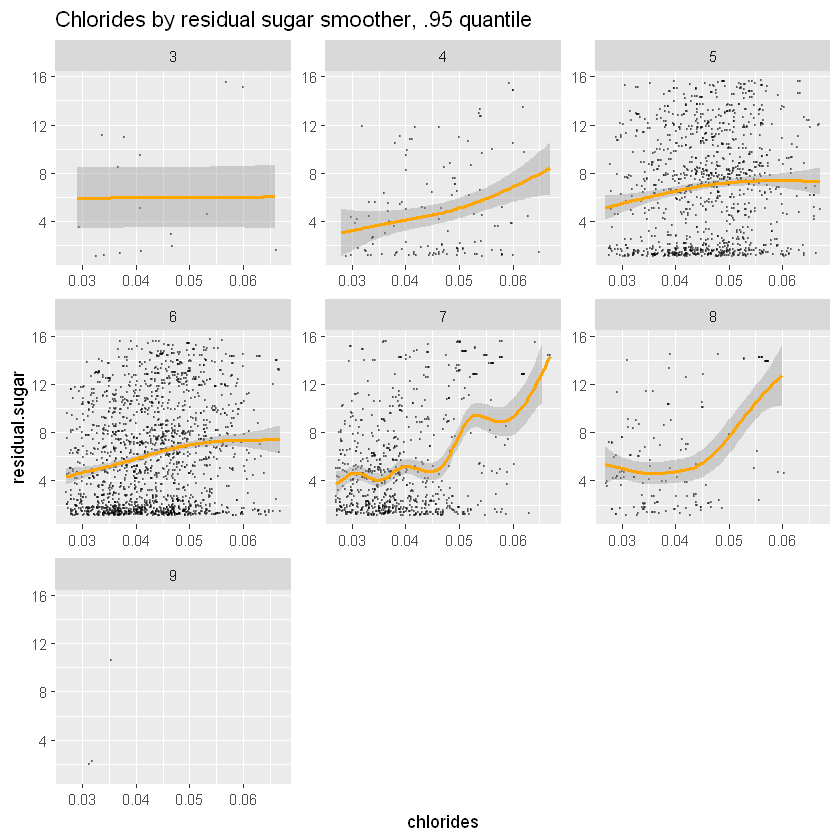

In [81]:
ggplot(aes(x = chlorides, y = residual.sugar), data = white_wines) +
  geom_jitter(alpha=0.4, size = 0.3) +
  geom_smooth(color=I('orange')) +
  xlim(quantile(white_wines$chlorides,0.05), 
       quantile(white_wines$chlorides,0.95)) +
  ylim(quantile(white_wines$residual.sugar,0.05), 
       quantile(white_wines$residual.sugar,0.95)) +
  facet_wrap(~quality.lvl, scales = 'free') +
  ggtitle("Chlorides by residual sugar smoother, .95 quantile")

Взаємозв'язок між хлоридами та залишковим цукром, здається, стає більш хвилястим (нелінійним) із покращенням якості. Це може зробити смак білого вина неприємним і непередбачуваним у кінцевому підсумку.

Давайте подивимося, чи допоможе співвідношення цукру до хлоридів:

Warning message:
"Removed 490 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?"
Warning message:
"Removed 490 rows containing missing values or values outside the scale range (`geom_point()`)."


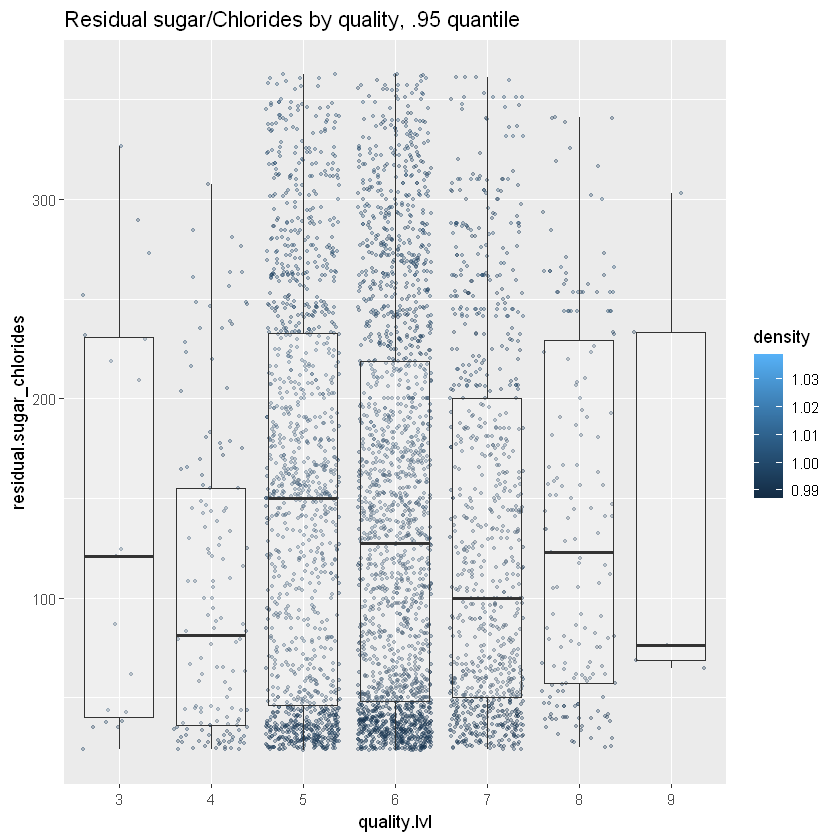

In [83]:
#adding ratio of residual.sugar/chlorides to white_wines dataframe
white_wines$residual.sugar_chlorides=with(white_wines,residual.sugar/chlorides)

ggplot(aes(x = quality.lvl, y = residual.sugar_chlorides, color = density), data = white_wines) +
  geom_jitter(alpha = 0.3, size = 0.7) +
  geom_boxplot(alpha = 0.2) +
  ylim(quantile(white_wines$residual.sugar_chlorides,0.05), 
       quantile(white_wines$residual.sugar_chlorides,0.95)) +
  ggtitle("Residual sugar/Chlorides by quality, .95 quantile")

Немає шансів тут. Я сподівався на деякі кластери точок для кожного рівня якості, але вони можуть сильно відрізнятися.

In [86]:
with(subset(white_wines, quality.lvl==5),cor(residual.sugar,chlorides))
with(subset(white_wines, quality.lvl==6),cor(residual.sugar,chlorides))
with(subset(white_wines, quality.lvl==7),cor(residual.sugar,chlorides))
with(subset(white_wines, quality.lvl==8),cor(residual.sugar,chlorides))

[1] 0.02252779

[1] 0.03512032

[1] 0.2755308

[1] 0.3148669

Кореляція для якості 5, 6 і 7 є досить низькою (0,02, 0,03 і 0,27 відповідно), але для якості 8 вона значна. Це може бути через те, що у нас менше точок для якості 8, ніж для інших рівнів якості. Крім того, у нас є дуже віддалені значення як для залишкового цукру, так і для хлоридів, давайте обчислимо ті ж значення на підмножині, обмеженій між 0,05 і 0,95 квантилями.

In [89]:
white_wines_quant<-subset(white_wines,
                        quantile(white_wines$residual.sugar,0.05)<=residual.sugar
                        & quantile(white_wines$residual.sugar,0.95)>=residual.sugar
                        & quantile(white_wines$chlorides,0.05)<=chlorides 
                        & quantile(white_wines$chlorides,0.95)>=chlorides)

with(subset(white_wines_quant, quality.lvl==5),
     cor(residual.sugar, chlorides))
with(subset(white_wines_quant, quality.lvl==6),
     cor(residual.sugar, chlorides))
with(subset(white_wines_quant, quality.lvl==7),
     cor(residual.sugar, chlorides))
with(subset(white_wines_quant, quality.lvl==8),
     cor(residual.sugar, chlorides))

[1] 0.1124103

[1] 0.1979728

[1] 0.3488694

[1] 0.417167

Кореляції трохи покращилися після видалення крайніх квантилів:

* 0,112 для якості 5
* 0,197 для якості 6
* 0,348 для якості 7
* 0,417 для якості 8

Я думаю, що цей взаємозв'язок між залишковим цукром і хлоридами варто дослідити, щоб побачити, чи можуть інші змінні вплинути на нього.
Отже, давайте зіставимо хлориди з цукром і додамо алкоголь як колір і використаємо це як основу для інших графіків.

### Хлориди, залишковий цукор і алкоголь за якістю

`geom_smooth()` using formula = 'y ~ x'


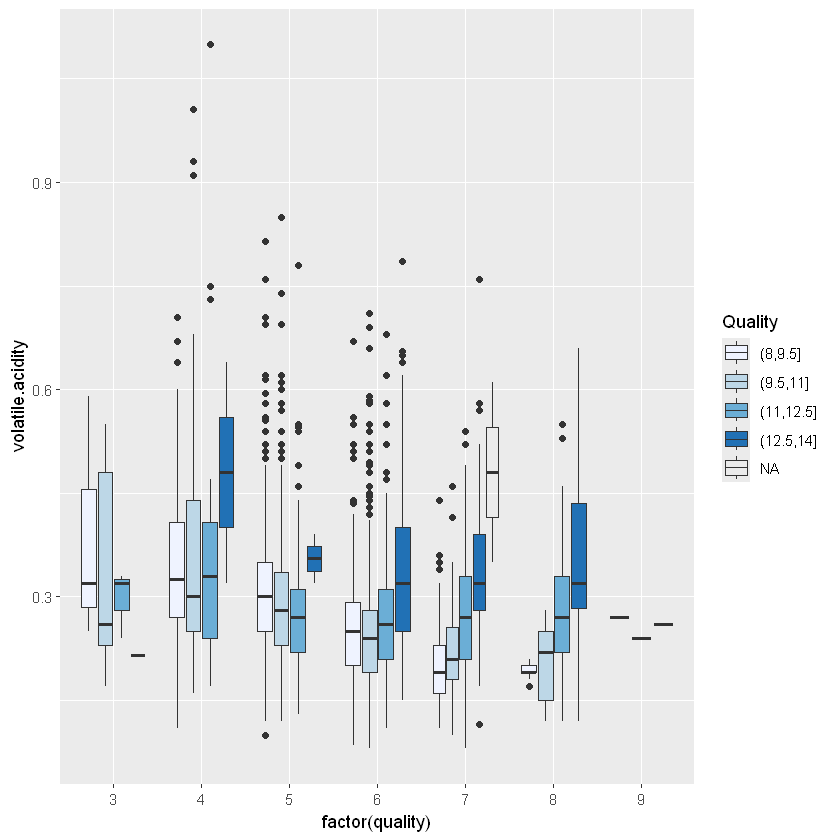

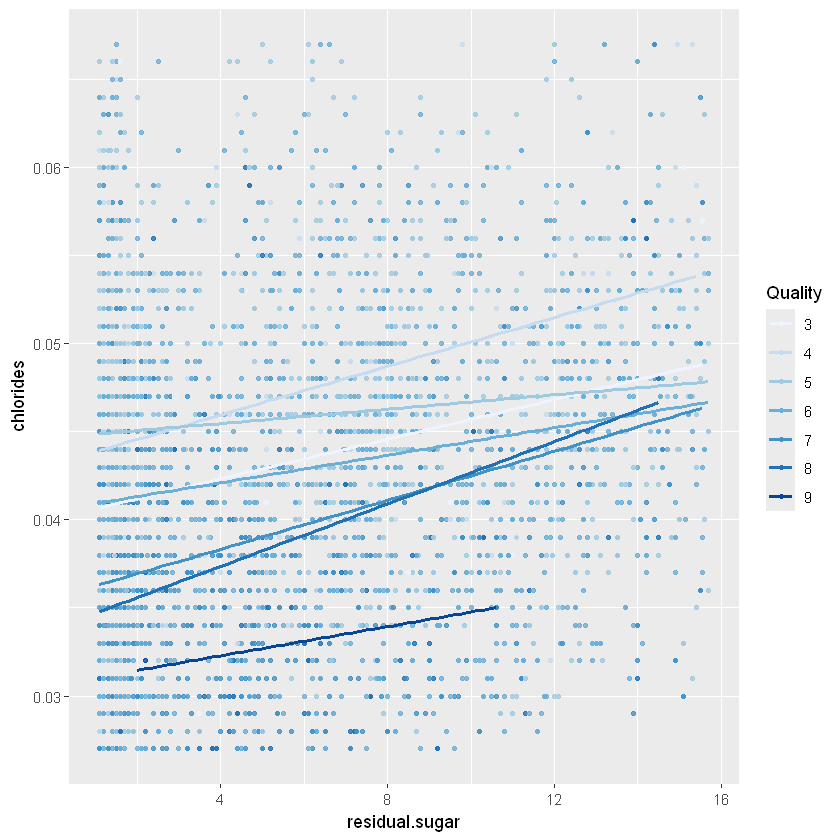

In [91]:
white_wines_quant$alcohol.bucket = cut(white_wines_quant$alcohol,
                            c(8, 9.5, 11, 12.5, 14))
ggplot(aes(x = factor(quality), y = volatile.acidity ), data = white_wines_quant) + 
   geom_boxplot( aes(fill= alcohol.bucket))  +
  scale_fill_brewer(type='seq', guide=guide_legend(title='Quality'))


ggplot(aes(x =residual.sugar, y = chlorides, color = factor(quality)), 
       data = white_wines_quant) +
      geom_point(alpha = 0.8, size = 1) +
      geom_smooth(method = "lm", se = FALSE,size=1)  +
  scale_color_brewer(type='seq', guide=guide_legend(title='Quality'))

Ми можемо побачити, як і раніше, що чим нижчий вміст хлоридів, тим кращий алкоголь. Крім того, низький рівень алкоголю, здається, має менше цукру і високий вміст хлоридів.

In [93]:
with(white_wines_quant, cor(residual.sugar_chlorides, alcohol))
with(subset(white_wines_quant, quality.lvl==5),
     cor(residual.sugar_chlorides, alcohol))
with(subset(white_wines_quant, quality.lvl==6),
     cor(residual.sugar_chlorides, alcohol))
with(subset(white_wines_quant, quality.lvl==7),
     cor(residual.sugar_chlorides, alcohol))
with(subset(white_wines_quant, quality.lvl==8),
     cor(residual.sugar_chlorides, alcohol))

[1] -0.2996015

[1] -0.3502557

[1] -0.3309418

[1] -0.2957432

[1] -0.2876385

Кореляція між залишковим цукром/хлоридами та алкоголем для підмножини становить -0,299, що є низьким показником. Розбиваючи за якістю, ми маємо:

* -0,350 для якості 5
* -0,330 для якості 6
* -0,295 для якості 7
* -0,287 для якості 8

Отже, кореляція не сильно змінюється залежно від якості. У нас немає специфічного взаємозв'язку для деяких якостей.

### Змінні кислотності та якість

Давайте повернемося до наших змінних кислотності:

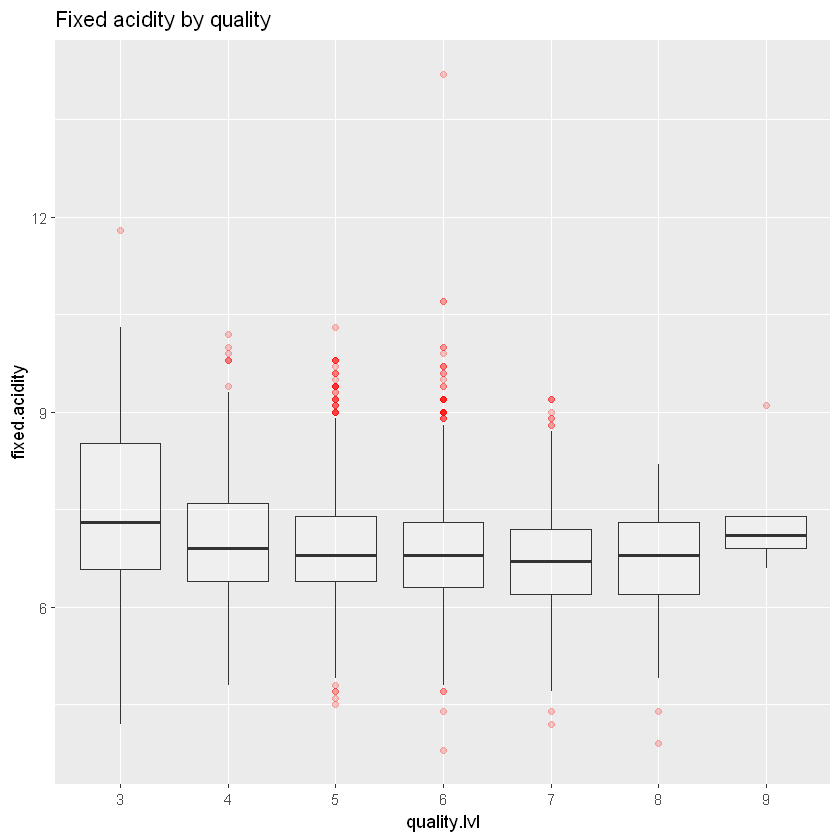

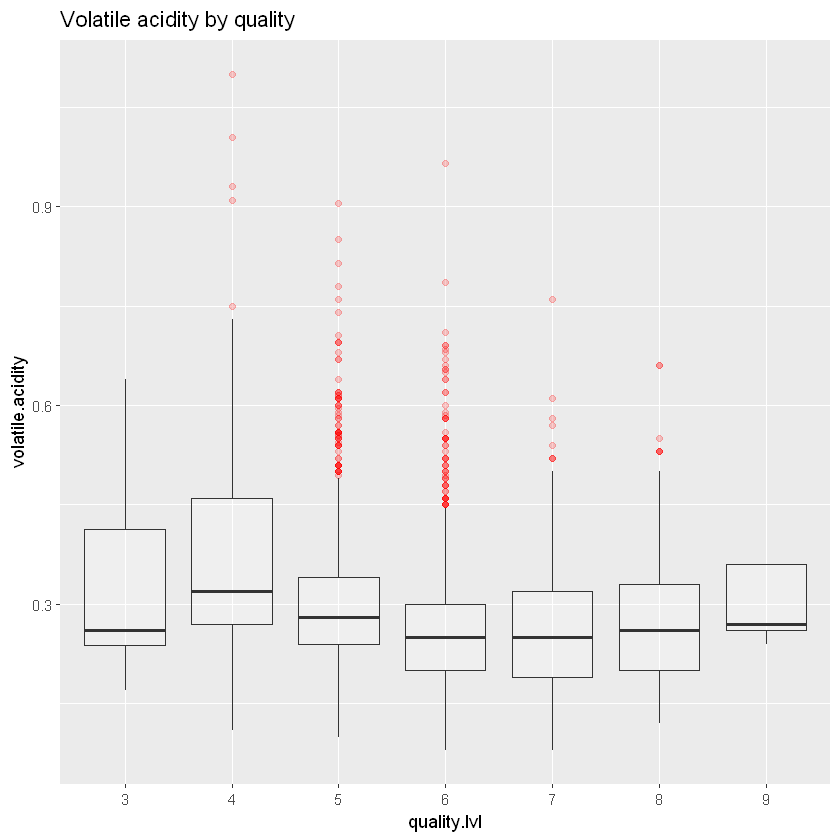

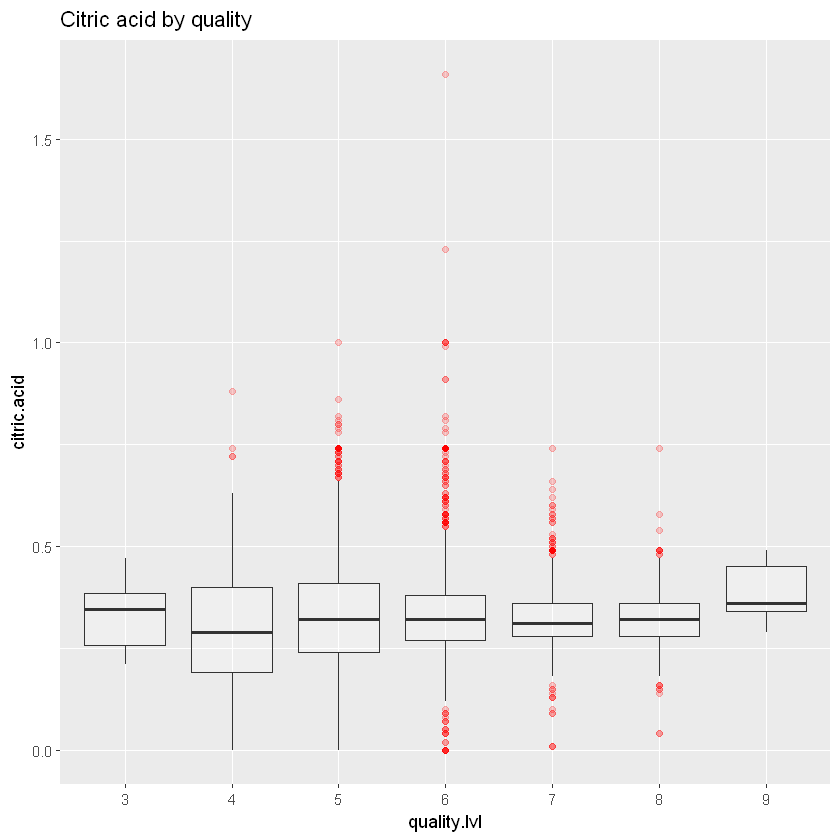

In [95]:
ggplot_base_acidity<-ggplot(aes(x = quality.lvl), data = white_wines)

#fixed acidity
ggplot_base_acidity +
  geom_boxplot(aes(y = fixed.acidity), outlier.colour = 'red', alpha = 0.2) +
  ggtitle("Fixed acidity by quality")

#volatile acidity
ggplot_base_acidity +
  geom_boxplot(aes(y = volatile.acidity), outlier.colour = 'red', alpha = 0.2) +
  ggtitle("Volatile acidity by quality")

#citric acidity
ggplot_base_acidity +
  geom_boxplot(aes(y = citric.acid), outlier.colour = 'red', alpha = 0.2) +
  ggtitle("Citric acid by quality")

Ці діаграми розмаху не дуже допомагають у дослідженні. Давайте перевіримо кореляції.

In [96]:
with(white_wines, cor(quality, fixed.acidity))
with(white_wines, cor(quality, volatile.acidity))
with(white_wines, cor(quality, citric.acid))

[1] -0.1136628

[1] -0.194723

[1] -0.009209091

Кореляція показує, що лимонна кислота дуже слабо корелює з якістю (-0,009).
З іншого боку, летка кислотність (-0,19) і фіксована кислотність (-0,11) дещо присутні, особливо летюча кислотність. Така кислотність негативно корелює з якістю, що означає, що зі збільшенням якості летюча кислотність зменшується. Оцтовий смак, який приносить летка кислотність, дійсно шкодить якості.

Отже, тепер у нас є алкоголь, фіксована кислотність і летка кислотність, які досить сильно корелюють з якістю.
Я повернуся до попередньої діаграми залишкового цукру та хлоридів і додам лимонну кислоту/летку кислотність, щоб побачити, чи зможу я отримати більше інформації.

### Хлориди, залишковий цукор і кислотність за якістю

[1] 0.08184145

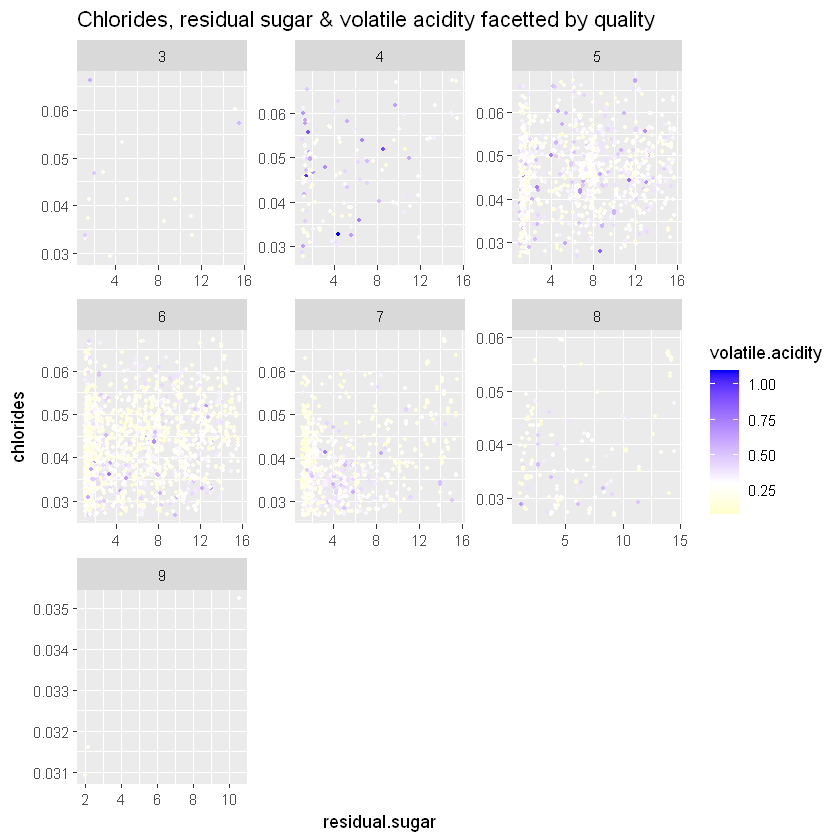

In [98]:
sugar.chlorides<-ggplot(aes(x = residual.sugar, y = chlorides), 
                        data = white_wines_quant) +
  facet_wrap(~quality.lvl, scales = 'free')

sugar.chlorides +
  geom_jitter(aes(color=volatile.acidity), size = 0.7) +
  scale_colour_gradient2(low="yellow", high="blue", midpoint=0.3) +
  ggtitle('Chlorides, residual sugar & volatile acidity facetted by quality')

with(white_wines_quant, cor(residual.sugar_chlorides, volatile.acidity))

Ми можемо побачити, що зі збільшенням рівня леткої кислотності якість, здається, трохи знижується (-0,19), що показує незначну негативну кореляцію.

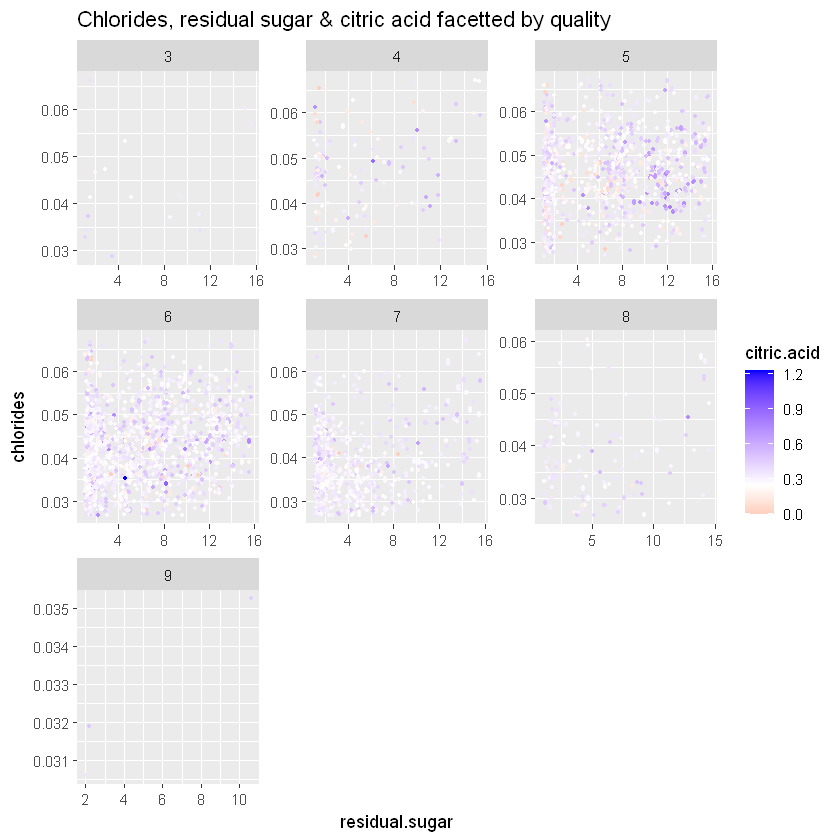

In [99]:
sugar.chlorides+
  geom_jitter(aes(color=citric.acid), size = 0.7) +
  scale_colour_gradient2(low="red", high="blue", midpoint=0.25) +
  ggtitle('Chlorides, residual sugar & citric acid facetted by quality')

Лимонна кислота і якість білого вина дужепов'язані. Здається, вирівнюються на всіх рівнях.

In [101]:
with(white_wines_quant, cor(residual.sugar_chlorides, citric.acid))
with(subset(white_wines_quant, quality.lvl==5),
     cor(residual.sugar_chlorides, citric.acid))
with(subset(white_wines_quant, quality.lvl==6),
     cor(residual.sugar_chlorides, citric.acid))
with(subset(white_wines_quant, quality.lvl==7),
     cor(residual.sugar_chlorides, citric.acid))
with(subset(white_wines_quant, quality.lvl==8),
     cor(residual.sugar_chlorides, citric.acid))

[1] 0.09948825

[1] 0.2050855

[1] 0.02915079

[1] 0.0073993

[1] 0.0828936

Кореляції показують, що насправді нічого немає. Кореляція для нашої підмножини становить 0,09. Розбиваючи за якістю:

* 0,20 для якості 5
* 0,02 для якості 6
* 0,007 для якості 7
* -0,08 для якості 8

### Хлориди, залишковий цукор і щільність за якістю
Щільність пов'язана з алкоголем, тому давайте подивимося, чи можемо ми знайти щось тут.

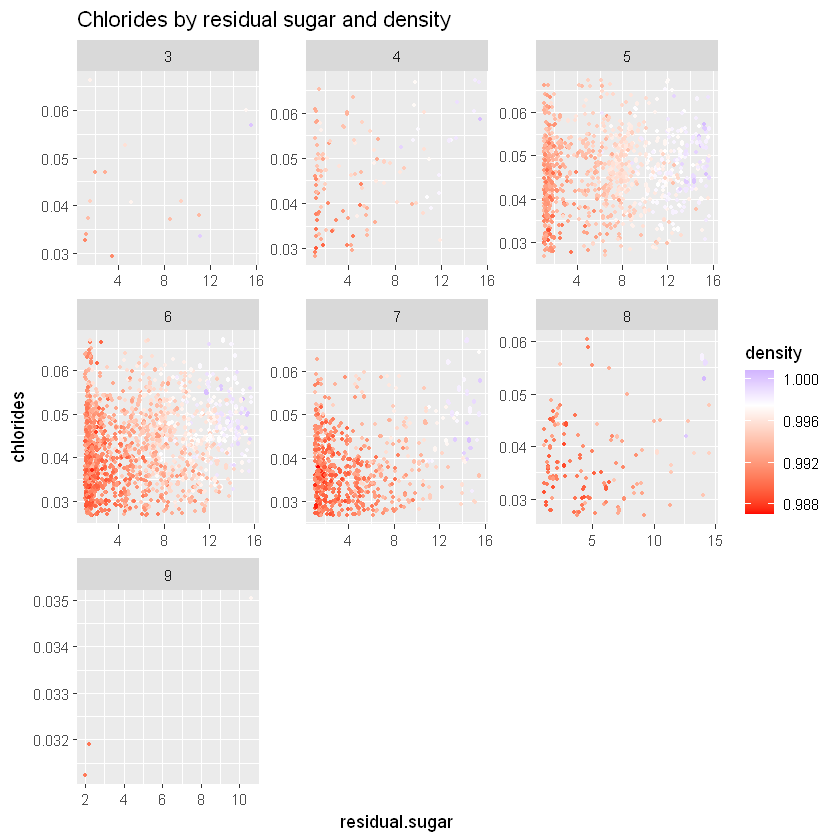

In [103]:
sugar.chlorides+
  geom_jitter(aes(color=density), size = 0.7) +
  scale_colour_gradient2(low="red", high="blue", midpoint=0.9975) +
  ggtitle("Chlorides by residual sugar and density")

Є певна тенденція: краща якість вина має вищий залишковий цукор і вищу щільність.

In [105]:
with(white_wines_quant, cor(residual.sugar_chlorides, density))
with(white_wines_quant, cor(residual.sugar_chlorides, alcohol))


with(subset(white_wines_quant, quality.lvl==5),
     cor(residual.sugar_chlorides, density))
with(subset(white_wines_quant, quality.lvl==5),
     cor(residual.sugar_chlorides, alcohol))

[1] 0.672887

[1] -0.2996015

[1] 0.7901922

[1] -0.3502557

Щільність більше пов'язана зі співвідношенням залишкового цукру до хлоридів, ніж з алкоголем: 0,67 проти -0,29. Ми маємо той самий феномен для якості 5: 0,79 для щільності проти -0,35 для алкоголю.

### Хлориди, залишковий цукор і сульфати за якістю

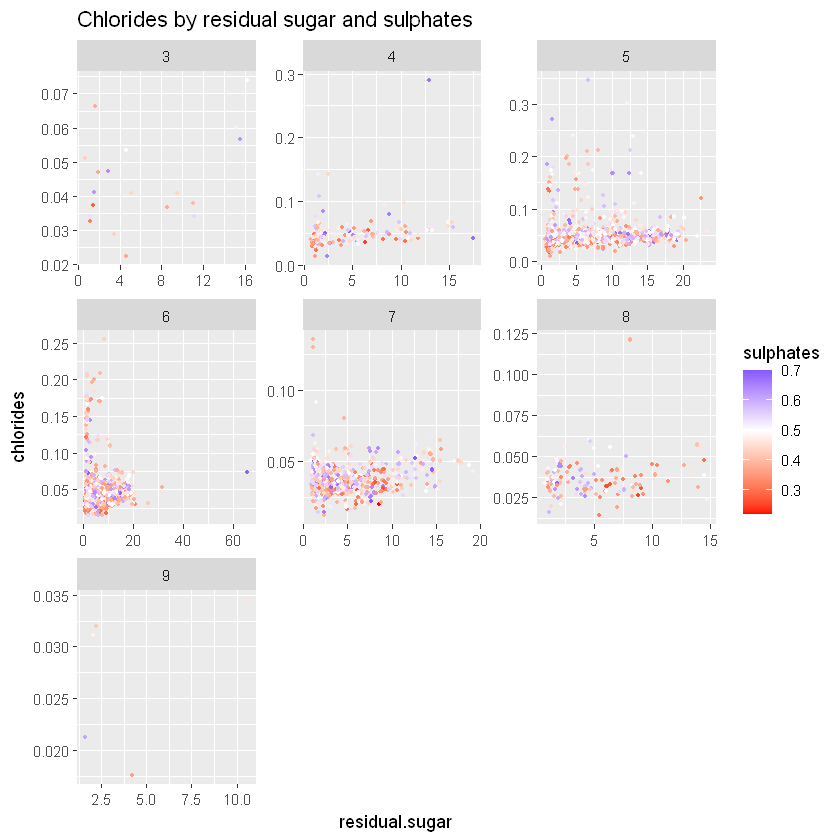

In [107]:
#adding a limit on the sulphates as there seems to be outlier far off
sugar.chlorides+
  geom_jitter(aes(color=sulphates), size =0.7, 
              data = subset(white_wines, 
                            sulphates<quantile(white_wines$sulphates,0.95))) +
  scale_colour_gradient2(low="red", high="blue", midpoint=0.5) +
  ggtitle("Chlorides by residual sugar and sulphates")

Здається, що чим більше залишкового цукру та хлоридів у вині, тим більше сульфатів.

In [109]:
with(white_wines_quant, cor(residual.sugar_chlorides, citric.acid))
with(subset(white_wines_quant, quality.lvl==5),
     cor(residual.sugar_chlorides, citric.acid))
with(subset(white_wines_quant, quality.lvl==6),
     cor(residual.sugar_chlorides, citric.acid))
with(subset(white_wines_quant, quality.lvl==7),
     cor(residual.sugar_chlorides, citric.acid))
with(subset(white_wines_quant, quality.lvl==8),
     cor(residual.sugar_chlorides, citric.acid))

[1] 0.09948825

[1] 0.2050855

[1] 0.02915079

[1] 0.0073993

[1] 0.0828936

Кореляції показують, що насправді нічого немає. Кореляція для нашої підмножини становить 0,09. Розбиваючи за якістю:

* 0,20 для якості 5
* 0,02 для якості 6
* 0,00 для якості 7
* 0,08 для якості 8

***

### Хлориди, залишковий цукор і щільність за якістю

Щільність пов'язана з алкоголем, тому давайте подивимося, чи можемо ми знайти щось тут.

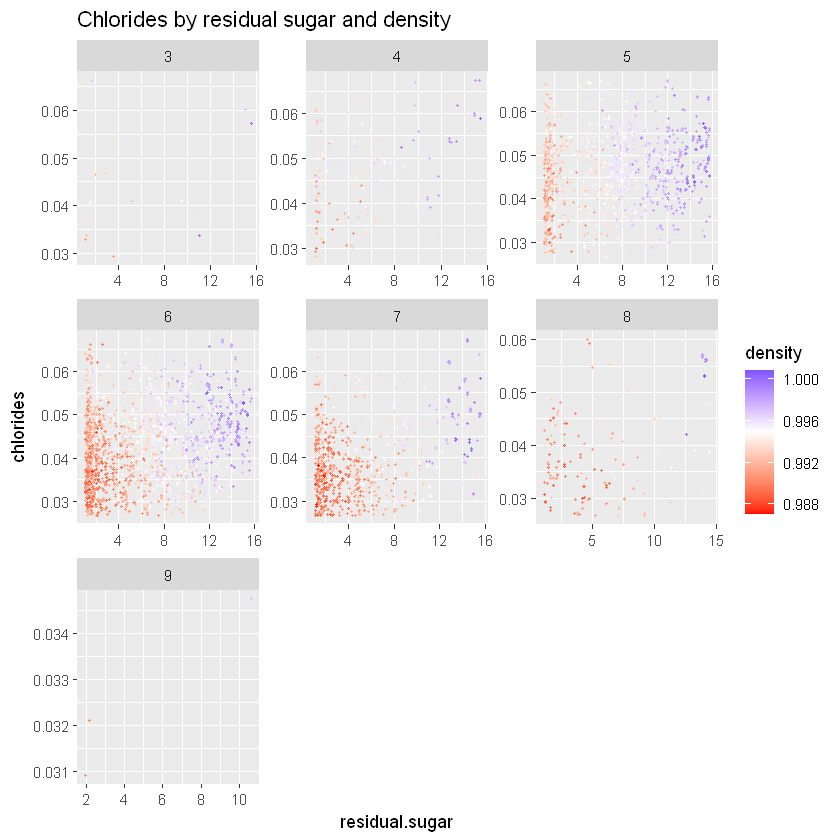

In [111]:
sugar.chlorides+
  geom_jitter(aes(color=density), size = 0.4) +
  scale_colour_gradient2(low="red", high="blue", midpoint=0.995) +
  ggtitle("Chlorides by residual sugar and density")

Ми отримуємо графік, де менш щільні вина знаходяться з лівого боку графіка, тоді як більш щільні вина розташовані в правій області на всіх рівнях якості.

In [112]:
with(white_wines_quant, cor(residual.sugar_chlorides, density))
with(white_wines_quant, cor(residual.sugar_chlorides, alcohol))

with(subset(white_wines_quant, quality.lvl==6),
     cor(residual.sugar_chlorides, density))
with(subset(white_wines_quant, quality.lvl==6),
     cor(residual.sugar_chlorides, alcohol))

[1] 0.672887

[1] -0.2996015

[1] 0.6908107

[1] -0.3309418

Щільність більше пов'язана зі співвідношенням залишкового цукру до хлоридів, ніж з алкоголем: 0,67 проти -0,29. Ми маємо той самий феномен для якості 6 (0,69 для щільності проти -0,33 для алкоголю).

### Хлориди, залишковий цукор і сульфати за якістю

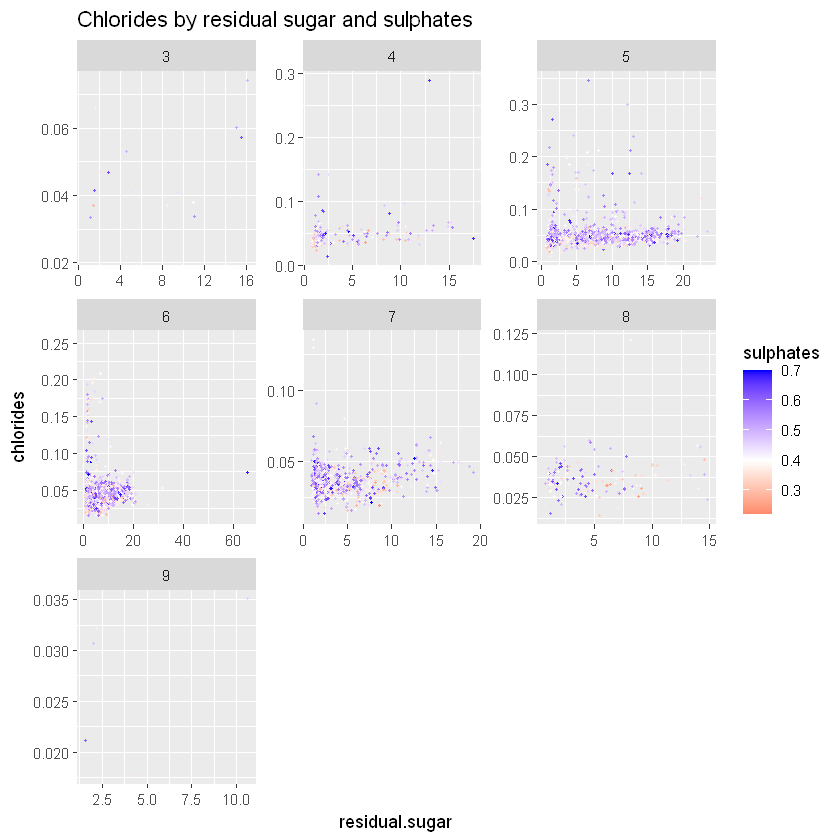

In [113]:
#adding a limit on the sulphates as there seems to be outlier far off
sugar.chlorides+
  geom_jitter(aes(color=sulphates), size = 0.4,
              data = subset(white_wines, 
                            sulphates<quantile(white_wines$sulphates,0.95))) +
  scale_colour_gradient2(low="red", high="blue", midpoint=0.4) +
  ggtitle("Chlorides by residual sugar and sulphates")

Здається, немає чіткої картини взаємозв'язку сульфатів з якістю, а також з хлоридами та залишковим цукром.

In [114]:
with(white_wines_quant, cor(residual.sugar_chlorides, sulphates))

with(subset(white_wines_quant, quality.lvl==5),
     cor(residual.sugar_chlorides, sulphates))
with(subset(white_wines_quant, quality.lvl==6),
     cor(residual.sugar_chlorides, sulphates))
with(subset(white_wines_quant, quality.lvl==7),
     cor(residual.sugar_chlorides, sulphates))
with(subset(white_wines_quant, quality.lvl==8),
     cor(residual.sugar_chlorides, sulphates))

[1] -0.0753957

[1] 0.02227755

[1] -0.07837732

[1] -0.1402696

[1] -0.2718309

Кореляція підтверджує це враження з кореляцією -0,07 для підмножини між залишковим цукром/хлоридами та сульфатами. Розбиваючи за якістю:

* 0,02 для якості 5
* -0,07 для якості 6
* -0,14 для якості 7
* -0,27 для якості 8

Кореляції за якістю низькі і збільшуються для якості 8, але ця якість 8 має лише кілька точок даних.

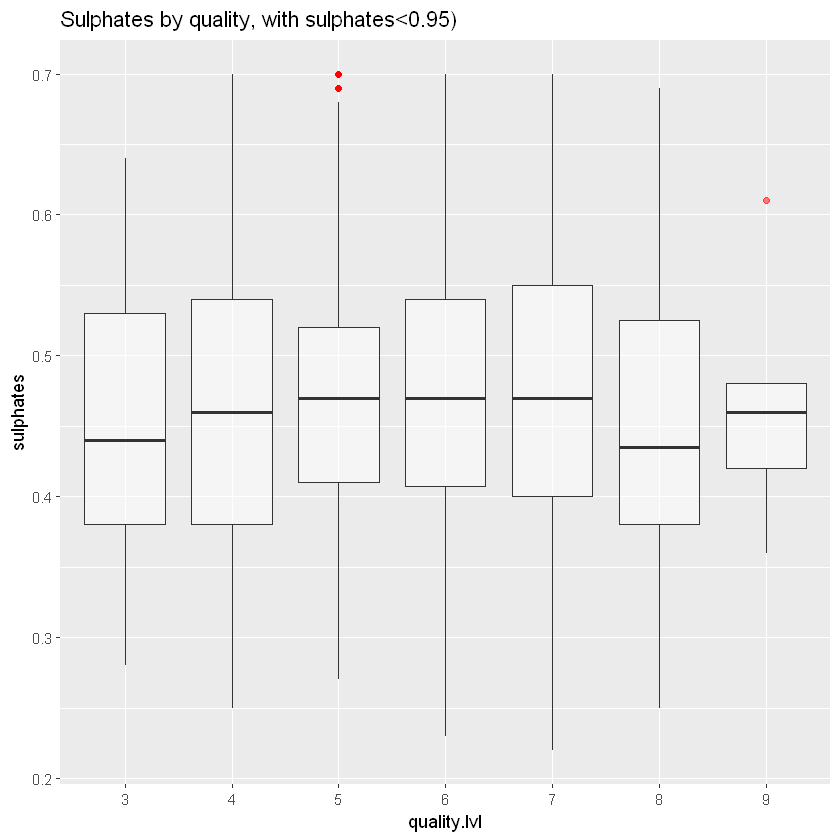

In [116]:
ggplot(aes(x = quality.lvl, y = sulphates), 
       data = subset(white_wines, 
                     sulphates<quantile(white_wines$sulphates,0.95))) +
  geom_boxplot(outlier.colour = 'red', alpha =0.5) +
  ggtitle("Sulphates by quality, with sulphates<0.95)")

Тут немає сильної кореляції.

In [119]:
with(white_wines_quant, cor(quality, sulphates))

[1] 0.0521672

Кореляція підтверджує це (0,05), що немає сильної залежності між якістю та сульфатами.

Давайте тепер подивимося на сірку.

### Хлориди, залишковий цукор і сірка за якістю

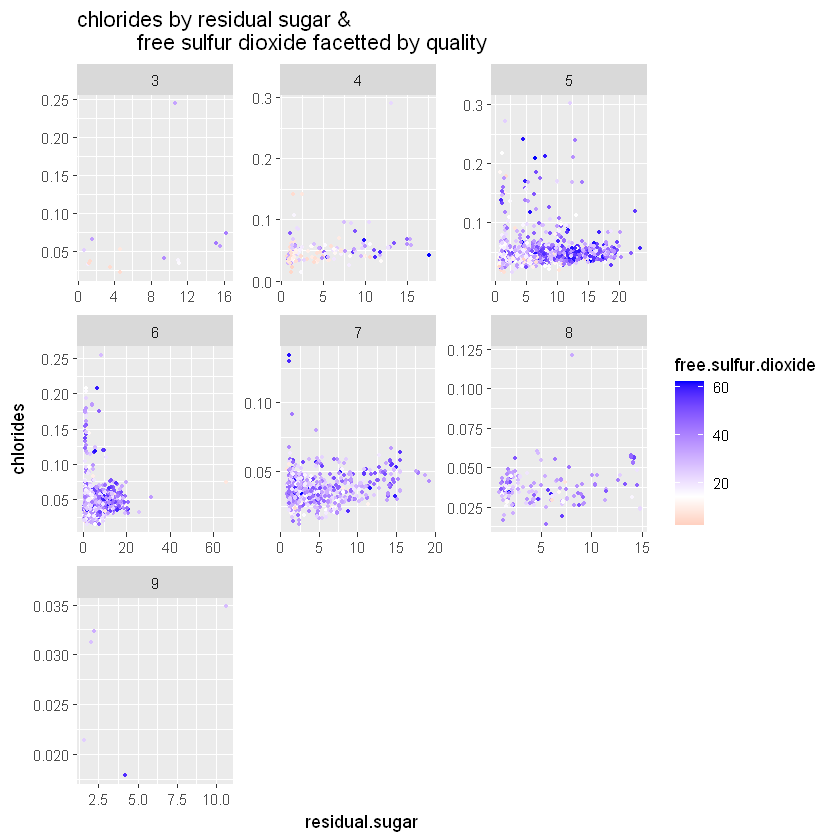

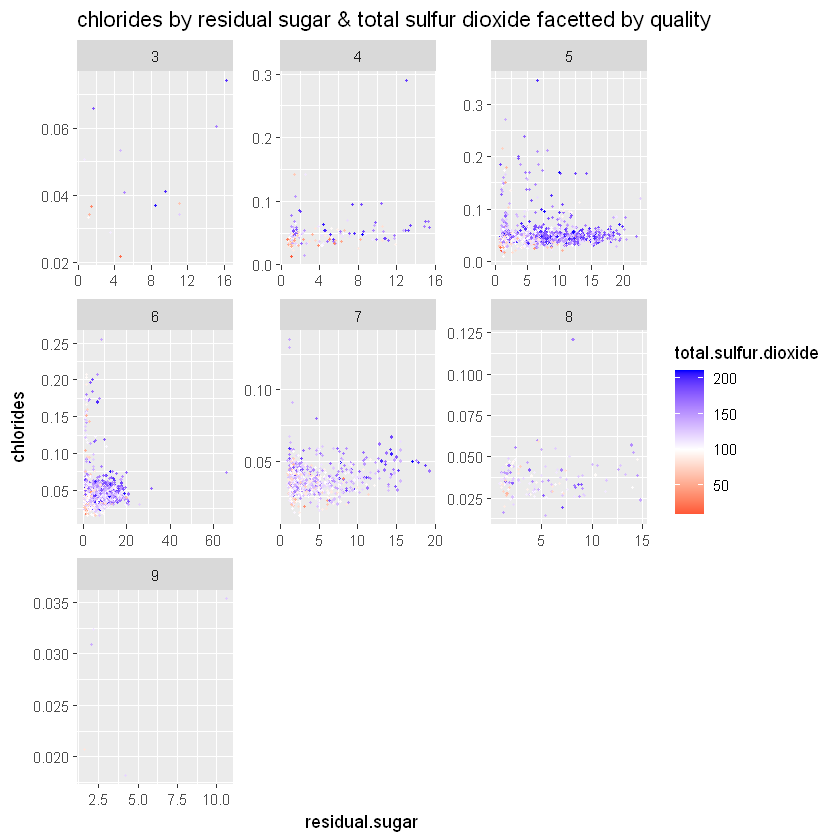

In [120]:
# subset to filter outlier
      
sugar.chlorides+
  geom_jitter(aes(color=free.sulfur.dioxide), size = 0.7, 
              data = subset(white_wines, 
                     free.sulfur.dioxide<quantile(white_wines$free.sulfur.dioxide,
                                                  0.95))) +
  scale_colour_gradient2(low="red", high="blue", midpoint=14) +
  ggtitle('chlorides by residual sugar & 
          free sulfur dioxide facetted by quality')


# subset to filter outlier
sugar.chlorides+
  geom_jitter(aes(color=total.sulfur.dioxide), size = 0.5, 
              data = subset(white_wines, 
                     total.sulfur.dioxide < 
                       quantile(white_wines$total.sulfur.dioxide, 0.95))) +
  scale_colour_gradient2(low="red", high="blue", midpoint=100) +
  ggtitle('chlorides by residual sugar & total sulfur dioxide facetted by quality')

Обидва графіки показують рівні сірки на всіх рівнях якості та на всіх рівнях залишкового цукру та хлоридів. Існує слабка позитивна залежність між цими змінними.

In [121]:
with(white_wines_quant, cor(residual.sugar_chlorides, free.sulfur.dioxide))
with(white_wines_quant, cor(residual.sugar_chlorides, total.sulfur.dioxide))

[1] 0.2728557

[1] 0.3028951

Кореляції дійсно слабко позитивні:

* 0,27 між залишковим цукром/хлоридами та вільним діоксидом сірки
* 0,30 між залишковим цукром/хлоридами та загальним діоксидом сірки

Перш за все, у наборі даних є викиди. Я намагався видалити їх, коли їх значення здавалося дійсно поза межами. Але це також може підкреслити різноманітність вин. Оскільки я не впевнений, наступні графіки базуються на всьому наборі даних.
Загалом, немає дійсно сильних кореляцій між якістю та іншими змінними, представленими тут. Але я міг зрозуміти деякі взаємозв'язки щодо смаків:

### Смак оцту не дуже шукають

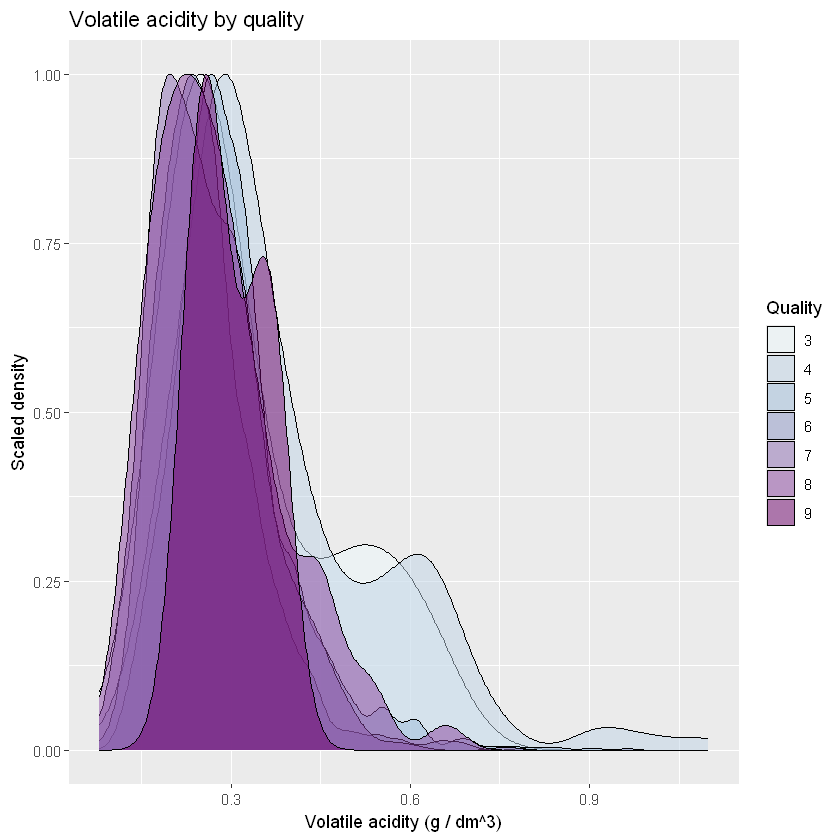

In [123]:
ggplot(aes(x = volatile.acidity, fill=quality.lvl), data = white_wines) +
  geom_density(aes(y=..scaled..), alpha = 0.5) +
  scale_fill_brewer(type = 'seq', palette = 3) +
  labs(x = 'Volatile acidity (g / dm^3)', 
       y = 'Scaled density',  
       fill='Quality') +
  ggtitle("Volatile acidity by quality")

_volatile.acidity = Смак оцту, насправді неприємний_

Щільність була масштабована так, щоб низькі кількості екстремальної якості не впливали на загальний розподіл.
З підвищенням якості вин летка кислотність знижується. Кореляція не така сильна, -0,19. Негативний знак означає, що чим вища летка кислотність (а отже, і смак оцту), тим нижча якість.
Це не завжди так. Це те, чого можна очікувати. Коли ви купуєте дешеве вино (яке не завжди, але найчастіше є нижчої якості), воно найчастіше має різкий запах і смак, як оцет.

### Лимонна кислота неефективна для якості білого вина

_лимонна кислота: у невеликих кількостях лимонна кислота може додати винам "свіжості" та смаку_

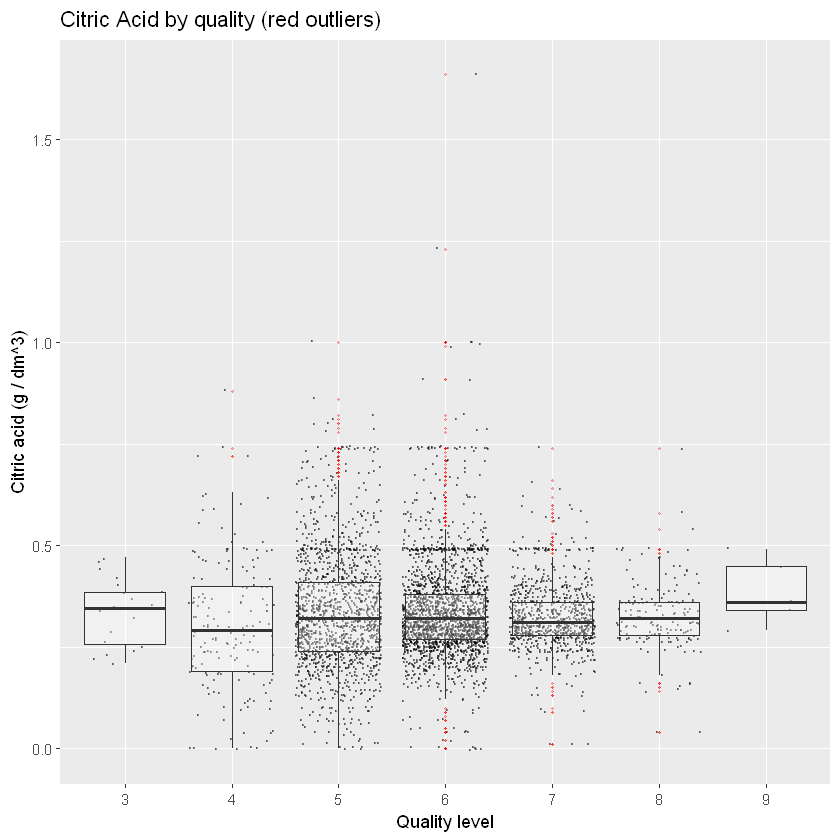

In [125]:
ggplot(aes(x = quality.lvl, y = citric.acid), data = white_wines) +
  geom_jitter(size = 0.1, alpha = 0.4) +
  geom_boxplot(outlier.colour = 'red', alpha =0.3, outlier.size = 0.5) +  
  labs(x = 'Quality level', 
       y = 'Citric acid (g / dm^3)') +
  ggtitle("Citric Acid by quality (red outliers)")

лимонна кислота не відіграє такої значної ролі у підвищенні якості.

### Отримайте високий рівень алкоголю та низький рівень сульфатів для кращих білих вин

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 1157 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.41905"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.06095"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 0.022786"
Warning message in sqrt(sum.squares/one.delta):
"NaNs produced"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(m

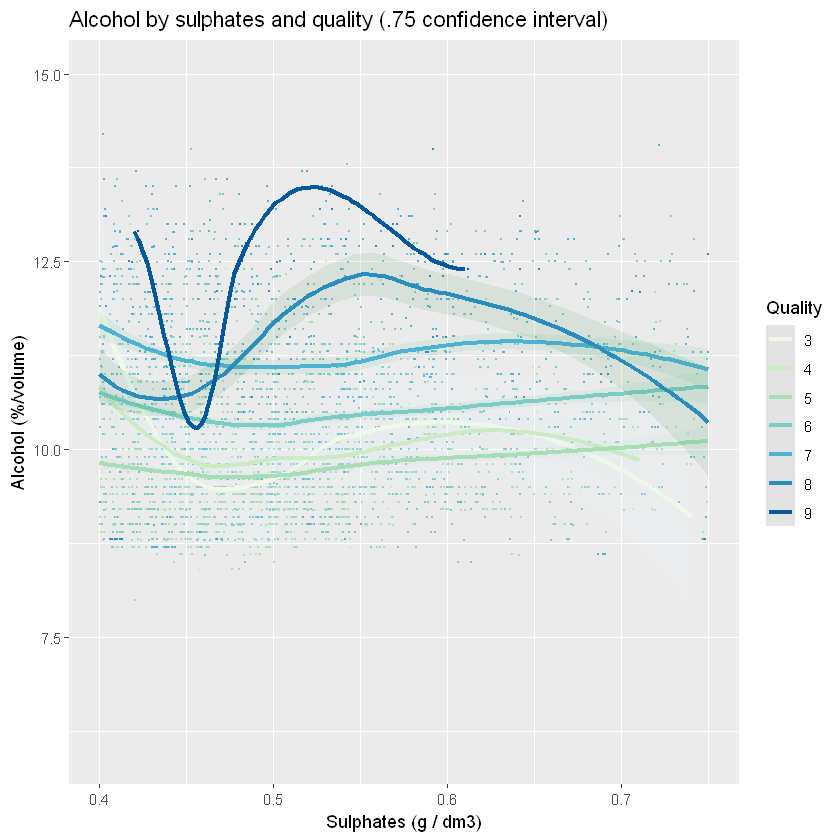

In [127]:
ggplot(aes(x = sulphates, y = alcohol, color = quality.lvl), 
       data = white_wines) +
  geom_jitter(size = 0.2) +
  stat_smooth(aes(fill = quality.lvl),
              level = 0.75, size = 1.2, alpha = 0.1, method = 'loess') +
  coord_cartesian() +
  xlim(0.4,0.75) +
  ylim(6,15) +
  scale_fill_brewer(type = 'seq', palette = 2, guide = FALSE) +
  scale_color_brewer(type = 'seq', palette = 4) +
  labs(x = 'Sulphates (g / dm3)', 
       y = 'Alcohol (%/volume)', 
       color = 'Quality') +
  ggtitle("Alcohol by sulphates and quality (.75 confidence interval)")

Цей графік показує згладжування алкоголю за сульфатами для всіх якостей. Якість і алкоголь мають сильну кореляцію.

Вина низької якості (3) сильно варіюються, але загальна тенденція полягає в тому, що вони мають низький вміст алкоголю, і рівень алкоголю знижується зі збільшенням рівня сульфатів. Якості від 4 до 7 загалом рівні, і єдині відмінності походять від рівня алкоголю.
Вина якості 7 і 8 особливі тим, що вони згруповані у верхньому лівому куті. Взаємозв'язок не є рівним, як у інших якостей (крім 3), але ці вина мають високий вміст алкоголю та менше сульфатів.

### Зверніть увагу на меншу присутність хлоридів для кращого вина

_лимонна кислота: кількість солі у вашому вині_

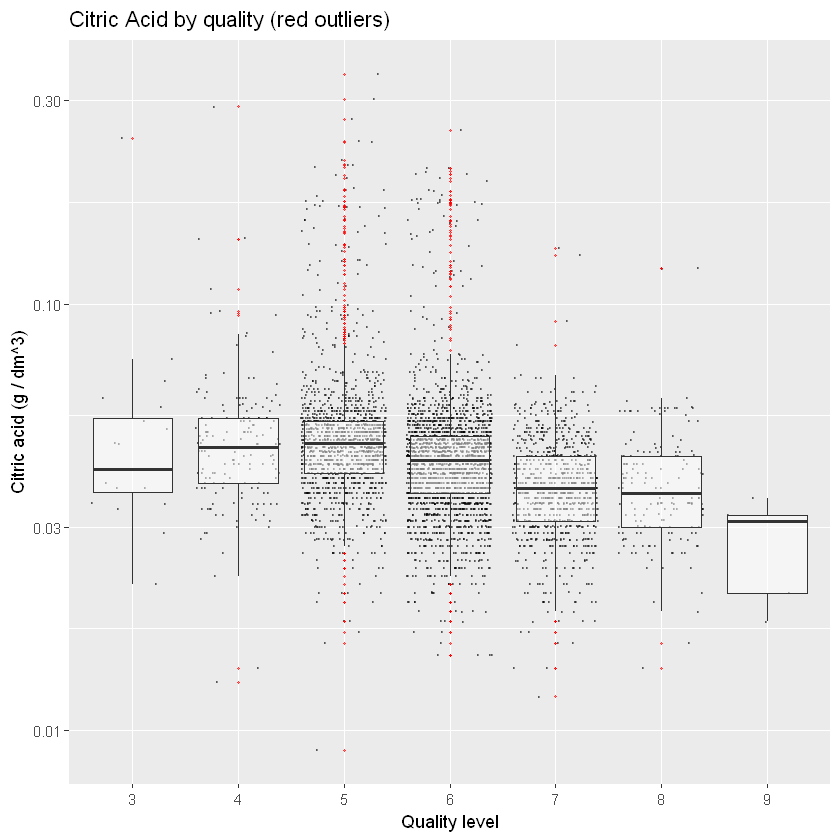

In [128]:
ggplot(aes(x = quality.lvl, y = chlorides), data = white_wines) +
  geom_jitter(size = 0.1, alpha = 0.4) +
  scale_y_continuous(trans = 'log10') +
  geom_boxplot(outlier.colour = 'red', alpha =0.5, outlier.size = 0.5) +  
  labs(x = 'Quality level', 
       y = 'Citric acid (g / dm^3)') +
  ggtitle("Citric Acid by quality (red outliers)")

# Остаточні графіки та підсумок

У наведеному вище аналізі я намагався задокументувати свої проблеми та рішення. Я повторю три з наведених вище графіків і поясню, чому вони є важливими.

`geom_smooth()` using formula = 'y ~ x'


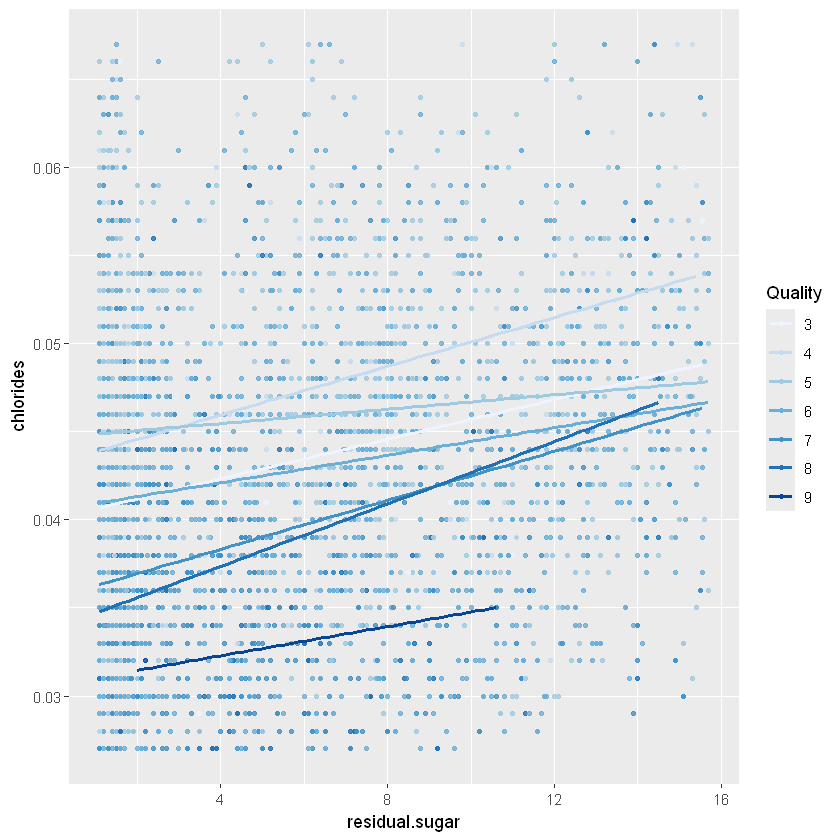

In [129]:
#adding ratio of residual.sugar/chlorides to white_wines dataframe
ggplot(aes(x =residual.sugar, y = chlorides, color = factor(quality)), 
       data = white_wines_quant) +
      geom_point(alpha = 0.8, size = 1) +
      geom_smooth(method = "lm", se = FALSE,size=1)  +
  scale_color_brewer(type='seq', guide=guide_legend(title='Quality'))

Я включаю цей графік, тому що це був наш перший сильний доказ якості алкоголю. Ми можемо бачити, як і раніше, що чим нижчий вміст хлоридів, тим кращий алкоголь. Крім того, низький рівень алкоголю, здається, має менше цукру та високий вміст хлоридів.

Цей графік викликав у мене інтерес до вивчення взаємозв'язку хлоридів і кислот.

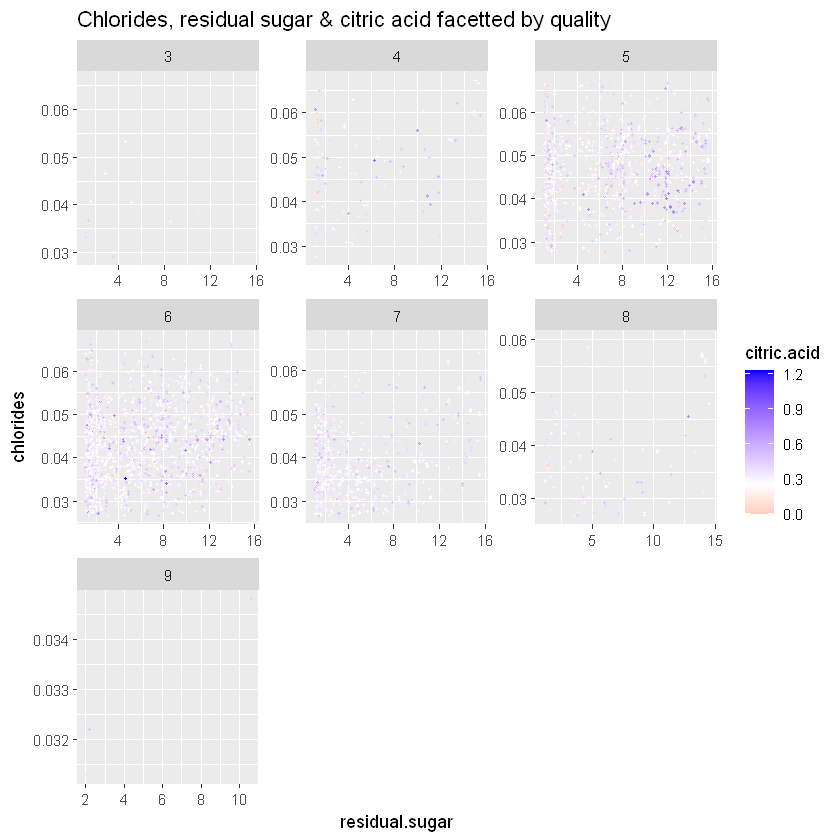

In [131]:
sugar.chlorides+
  geom_jitter(aes(color=citric.acid), size = 0.5) +
  scale_colour_gradient2(low="red", high="blue", midpoint=0.25) +
  ggtitle('Chlorides, residual sugar & citric acid facetted by quality')

лимонна кислота та якість білого вина дуже мало пов'язані. Наприкінці аналізу ми підтвердили це, побудувавши діаграму розмаху лимонної кислоти, яка показала, що вона не відіграє значної ролі у підвищенні якості білого вина.

Warning message:
"Removed 469 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 469 rows containing non-finite outside the scale range (`stat_summary()`)."
Warning message:
"Removed 504 rows containing missing values or values outside the scale range (`geom_point()`)."


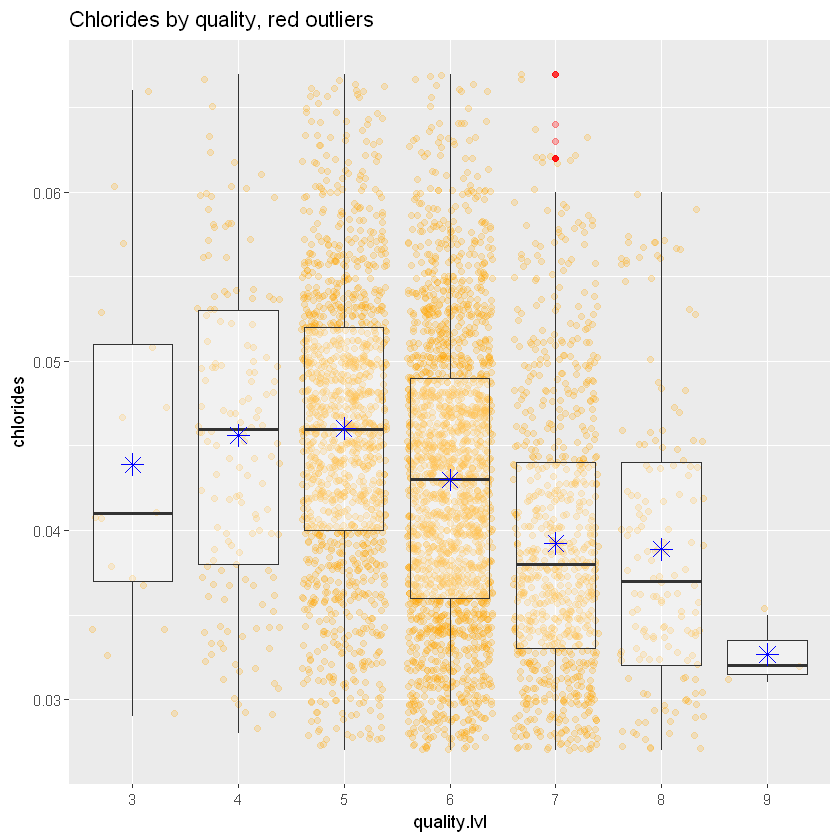

In [133]:
ggplot(aes(x = quality.lvl, y = chlorides), data = white_wines) +
  geom_jitter(alpha = 0.2, color = 'orange') +
  geom_boxplot(outlier.colour = 'red', alpha = 0.3) +
  stat_summary(fun.y = "mean", geom = "point", color = "blue", shape = 8, size = 4) +
  coord_cartesian() +
  ylim(quantile(white_wines$chlorides,0.05),quantile(white_wines$chlorides,0.95)) +
  ggtitle("Chlorides by quality, red outliers")

Загальна низхідна тенденція тут із сильною кореляцією говорить нам про те, що менше солі у вині означає кращу якість.

## Підсумки

У цьому проєкті моя основна увага була зосереджена на проведенні лише дослідницького аналізу.

Я розпочав аналіз з огляду на загальні дані. Деякі точки даних здавалися дійсно далекими, і під час аналізу я видалив деякі з них. Але в кінцевому підсумку я вирішив залишити їх, оскільки смаки вина можуть сильно відрізнятися.
Розглядаючи різні змінні, я вирішив дослідити, що робить вино хорошим.
Я почав з розгляду основних факторів, які можуть впливати на смак: алкоголь, хлориди, залишковий цукор і pH. Моїм першим висновком було те, що алкоголь і якість дійсно пов'язані.
Потім я перейшов до багатозмінного аналізу, поєднуючи алкоголь з хлоридами та залишковим цукром. Загальні тенденції за якістю виглядали досить схожими, тому я спробував побудувати графік хлоридів із залишковим цукром. Але результат не був таким, як я очікував. Думаючи, що інший фактор може бути пов'язаний з цими двома, я пройшов через змінні кислотності та якості, щоб вибрати летючу кислотність і лимонну кислоту та побудувати їх з хлоридами та залишковим цукром.
Я зробив те саме для решти змінних. Я шукав більш складні взаємозв'язки між змінними, але не зміг їх знайти. В цілому, я отримав кілька змінних, що корелюють з якістю:

- Алкоголь
- Летюча кислотність
- Лимонна кислота
- Сульфати

Обмеження набору даних полягають у відсутності точок для вин нижчої та вищої якості. Крім того, джерело якості невідоме: це професіонал? Магазин? І ми повинні пам'ятати, що смак - це дуже культурна річ (див. [аналіз індійської їжі](http://www.washingtonpost.com/blogs/wonkblog/wp/2015/03/03/ a-scientific-explanation-of-what-makes-indian-food-so-delicious/)), і хороше вино для однієї людини може не бути таким для іншої.

Останнє, але не менш важливе, ми не маємо віку вина. У Франції однією з перших речей, яку перевіряють у вина, є його вік, оскільки загальновідомо, що старіше вино краще. Ще одна річ, яку я хотів би мати, це назви вин, щоб я міг дізнатися їхні ціни та побачити, як вони співвідносяться з якістю.